# Exploratory Data Analysis on Raw Drilling Data


### Task to do
This notebook will guide you to extract drilling data from CNLOPB website. 


The overall goal is to extract drilling data from CNLOPB repository and perform exploratory data analysis.


### Data Source
CNLPOB - Canada-Newfoundland & Labrador Offshore Petroleum Borad (https://www.cnlopb.ca/)

In this notebook, we will explore drilling data from CNLOPB website.


Go To CNLOPB websie and Search for Well Hibernia B-16 38. Yon can also find data in the link below. 

https://home-cnlopb.hub.arcgis.com/pages/well-inventory

Check Inventory & LAS section for this well (Hibernia B-16 38)

Alternatively, you can find inventory and LAS file loaction in the link below 

https://home-cnlopb.hub.arcgis.com/pages/hibernia-b-16-38





Now we will investigate the content for 311 mm Section

Download the file LAS-011361 for Hibernia B-16 38 - FDP 311 mm Section as shown in the image below-

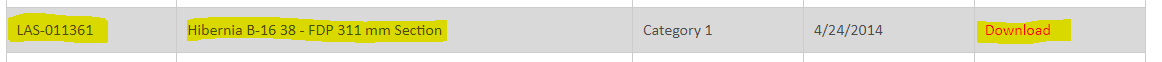



Alternatively you can download the LAS data file from the link below-
https://cnlopb.maps.arcgis.com/sharing/rest/content/items/9b346dbd45f74aaa836dbfed4c8b3aab/data

In [218]:

# !pip uninstall matplotlib
# !pip install --upgrade matplotlib

In [219]:
# !pip install lasio

In [220]:
! pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [221]:
import pandas as pd
# import matplotlib.pyplot as plt
import lasio
import warnings
import missingno as msno
import seaborn as sns
warnings.filterwarnings('ignore')

Try to open this file using the code line below.

In [222]:
# df= pd.read_csv("Hibernia B-16 38 - FDP 311 mm Section LAS-011361.csv")   

# To run this cell, remove '#' from above line 

We got the following error 

#### UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 3039: invalid start byte


These files originally created as LAS format, we will rename the fie extension from 'csv to 'las and load again.


To run a LAS file in python, we need to install lasio library. If you do not have lasio installed, please install it.

In [223]:
# Read the las file

las311 = lasio.read("G:\\My Drive\\ACENET Class 2024\\1. ISP Class\\1. ISP 2 July Class\\LAS-011361.las")



In [224]:
well311 = las311.df()

In [225]:
# Check for meta data
# We will get details of the drilling activities such as time, date, locations, company name etc.

for item in las311.sections['Well']:
    print(f"{item.descr} ({item.mnemonic}):{item.value}")

START TIME(OLE Automation date) (STRT):41,586.4802777778
STOP TIME(OLE Automation date) (STOP):41,597.5413888889
STEP TIME(60s in time) (STEP):0
NULL VALUE (NULL):-999.25
COMPANY (COMP):HMDC          ExxonMobil Canada Use Only
WELL NAME (WELL):B-16 38 (OPNN1)
FIELD NAME (FLD):Hibernia
Rig Name (RIGN):M-71 East Rig
Rig Type (RIGTYP):Platform
Service Order Number (SON):13CNF0009
SERVICE COMPANY (SRVC):Schlumberger
LOG DATE(Composite Date for Composite LAP) (MM/DD/YYYY) (DATE):11/08/2013
County Label (CLAB):County:
COUNTY (CNTY):
State/Province Label (SLAB):Province:
STATE or PROVINCE (STAT):Newfoundland and Labrador
STATE or PROVINCE (PROV):Newfoundland and Labrador
COUNTRY (CTRY):Canada
Continent Region (CONT_REGION):N. America
Section (SECT):
Township (TOWN):
Range (RANG):
API NUMBER (API):
UNIQUE WELL ID (UWI):821939
Logging Unit Location (LUL):Pipe Deck
Logging Unit Number (LUN):OLU-HD-9604
FIELD LOCATION (LOC):Grand Banks
Field Location Line 1 (FL1):X:669440.500 m
Field Location Lin

In [226]:
# Check for data channels 

for curve in las311.curves:
    print(curve.mnemonic)

TIME_1900
TIME
DEPTH
RPM
STOR
DTOR
SWOB
DWOB
ROP5
SMSE
TFLO
ECD
SPPA
VIB_LAT
VIB_X
VIB_TOR
STICKRATIO
STICK
HKLA
COBTM
BLKP
PVEL
CRPM
TRPM
SHKRSK
SHOK_RSK
AZIM_CONT
INCL_CONT
DHAP


In [227]:
# Check for Units and descriptions
  
for curve in las311.curves:
    print(f"{curve.mnemonic}:\t{curve.unit}:\t{curve.descr}")


TIME_1900:	d:	Time Index(OLE Automation date)
TIME:	s:	(60s)                   Time(hh mm ss/dd-MMM-yyyy)
DEPTH:	m:	(RT)    (DnMWorkflow)                                   Depth Index
RPM:	c/min:	(RT)    (DRILLING_SURFACE)                              Rotational Speed
STOR:	kN.m:	(RT)    (DRILLING_SURFACE)                              Surface Torque
DTOR:	kN.m:	(RT)    (TELE900-IWOB)                                  Downhole Torque (MWD)
SWOB:	1000 kgf:	(RT)    (DRILLING_SURFACE)                              Surface Weight On Bit
DWOB:	1000 kgf:	(RT)    (TELE900-IWOB)                                  Downhole Weight on Bit
ROP5:	m/h:	(RT)    (DRILLING_SURFACE)                              Rate of penetration averaged over the last 5 ft (1.5 m)
SMSE:	1000 psi:	(RT)    (Borehole)                                      Surface Mechanical Specific Energy
TFLO:	L/min:	(RT)    (DRILLING_SURFACE)                              Total flow rate of all active pumps
ECD:	kg/m3:	(RM)    (ARC9)        

In [228]:
# Create a dataframe from LAS file

well311 = las311.df()

In [229]:
# First look at the dataframe
well311

TIME    DEPTH   RPM    STOR  DTOR      SWOB  \
TIME_1900                                                                   
41586.480278  11:31:36/08-Nov-2013  29.8812   0.0  0.0000   NaN  110.4881   
41586.480972  11:32:36/08-Nov-2013  53.1780   0.0  0.0000   NaN  122.7929   
41586.481667  11:33:36/08-Nov-2013  53.8603  20.0  0.0678   NaN  123.9415   
41586.482361  11:34:36/08-Nov-2013  52.6114   0.0  0.0000   NaN  123.6583   
41586.483056  11:35:36/08-Nov-2013  52.5203   0.0  0.0000   NaN  121.8112   
...                            ...      ...   ...     ...   ...       ...   
41597.538611  12:55:36/19-Nov-2013      NaN   NaN     NaN   NaN       NaN   
41597.539306  12:56:36/19-Nov-2013      NaN   NaN     NaN   NaN       NaN   
41597.540000  12:57:36/19-Nov-2013      NaN   NaN     NaN   NaN       NaN   
41597.540694  12:58:36/19-Nov-2013      NaN   NaN     NaN   NaN       NaN   
41597.541389  12:59:36/19-Nov-2013      NaN   NaN     NaN   NaN       NaN   

              DWOB  ROP5  SMSE  TFLO  ...  COBTM    BLKP    PVEL  CRPM  TRPM  \
TIME_1900                             ...                                      
41586.480278   NaN   NaN   NaN   0.0  ...    1.0  1.5643  0.0000   NaN   NaN   
41586.480972   NaN   NaN   NaN   0.0  ...    1.0  1.3470  0.0117   NaN   NaN   
41586.481667   NaN   NaN   NaN   0.0  ...    1.0  0.6671  0.1003   NaN   NaN   
41586.482361   NaN   NaN   NaN   0.0  ...    1.0  1.8981 -0.0698   NaN   NaN   
41586.483056   NaN   NaN   NaN   0.0  ...    1.0  2.0021  0.0000   NaN   NaN   
...            ...   ...   ...   ...  ...    ...     ...     ...   ...   ...   
41597.538611   NaN   NaN   NaN   NaN  ...    NaN     NaN     NaN   NaN   NaN   
41597.539306   NaN   NaN   NaN   NaN  ...    NaN     NaN     NaN   NaN   NaN   
41597.540000   NaN   NaN   NaN   NaN  ...    NaN     NaN     NaN   NaN   NaN   
41597.540694   NaN   NaN   NaN   NaN  ...    NaN     NaN     NaN   NaN   NaN   
41597.541389   NaN   NaN   NaN   NaN  ...    NaN     NaN     NaN   NaN   NaN   

              SHKRSK  SHOK_RSK  AZIM_CONT  INCL_CONT     DHAP  
TIME_1900                                                      
41586.480278     NaN       NaN        NaN        NaN      NaN  
41586.480972     NaN       NaN        NaN        NaN      NaN  
41586.481667     NaN       NaN        NaN        NaN      NaN  
41586.482361     NaN       NaN        NaN        NaN      NaN  
41586.483056     NaN       NaN        NaN        NaN      NaN  
...              ...       ...        ...        ...      ...  
41597.538611     NaN       NaN        NaN        NaN  62.0528  
41597.539306     NaN       NaN        NaN        NaN  48.2633  
41597.540000     NaN       NaN        NaN        NaN  34.4738  
41597.540694     NaN       NaN        NaN        NaN  48.2633  
41597.541389     NaN       NaN        NaN        NaN      NaN  

[15929 rows x 28 columns]

#### Data Type

In [230]:
# Get coloum information and data types
# We can see that first row of data shows TIME but it saved as 'object'

well311.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15929 entries, 41586.4802777778 to 41597.5413888889
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TIME        15929 non-null  object 
 1   DEPTH       15044 non-null  float64
 2   RPM         15039 non-null  float64
 3   STOR        15039 non-null  float64
 4   DTOR        2762 non-null   float64
 5   SWOB        15044 non-null  float64
 6   DWOB        2754 non-null   float64
 7   ROP5        5779 non-null   float64
 8   SMSE        11883 non-null  float64
 9   TFLO        15039 non-null  float64
 10  ECD         14926 non-null  float64
 11  SPPA        15039 non-null  float64
 12  VIB_LAT     2571 non-null   float64
 13  VIB_X       2599 non-null   float64
 14  VIB_TOR     2468 non-null   float64
 15  STICKRATIO  2422 non-null   float64
 16  STICK       2468 non-null   float64
 17  HKLA        15044 non-null  float64
 18  COBTM       15044 non-null  float64
 19  BLKP

#### Change TIME from object to date time format

In [231]:
well311['TIME'] = pd.to_datetime(well311['TIME'])

In [232]:
# Check info again , now we can see that TIME data are as datetime64 format
# Also it shows total number of Non-Null data points for each data types

well311.info()



<class 'pandas.core.frame.DataFrame'>
Index: 15929 entries, 41586.4802777778 to 41597.5413888889
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   TIME        15929 non-null  datetime64[ns]
 1   DEPTH       15044 non-null  float64       
 2   RPM         15039 non-null  float64       
 3   STOR        15039 non-null  float64       
 4   DTOR        2762 non-null   float64       
 5   SWOB        15044 non-null  float64       
 6   DWOB        2754 non-null   float64       
 7   ROP5        5779 non-null   float64       
 8   SMSE        11883 non-null  float64       
 9   TFLO        15039 non-null  float64       
 10  ECD         14926 non-null  float64       
 11  SPPA        15039 non-null  float64       
 12  VIB_LAT     2571 non-null   float64       
 13  VIB_X       2599 non-null   float64       
 14  VIB_TOR     2468 non-null   float64       
 15  STICKRATIO  2422 non-null   float64       
 16  S

#### Let's have a look at the missing data

In [233]:
# pip install matplotlib==3.2.0

<Axes: >

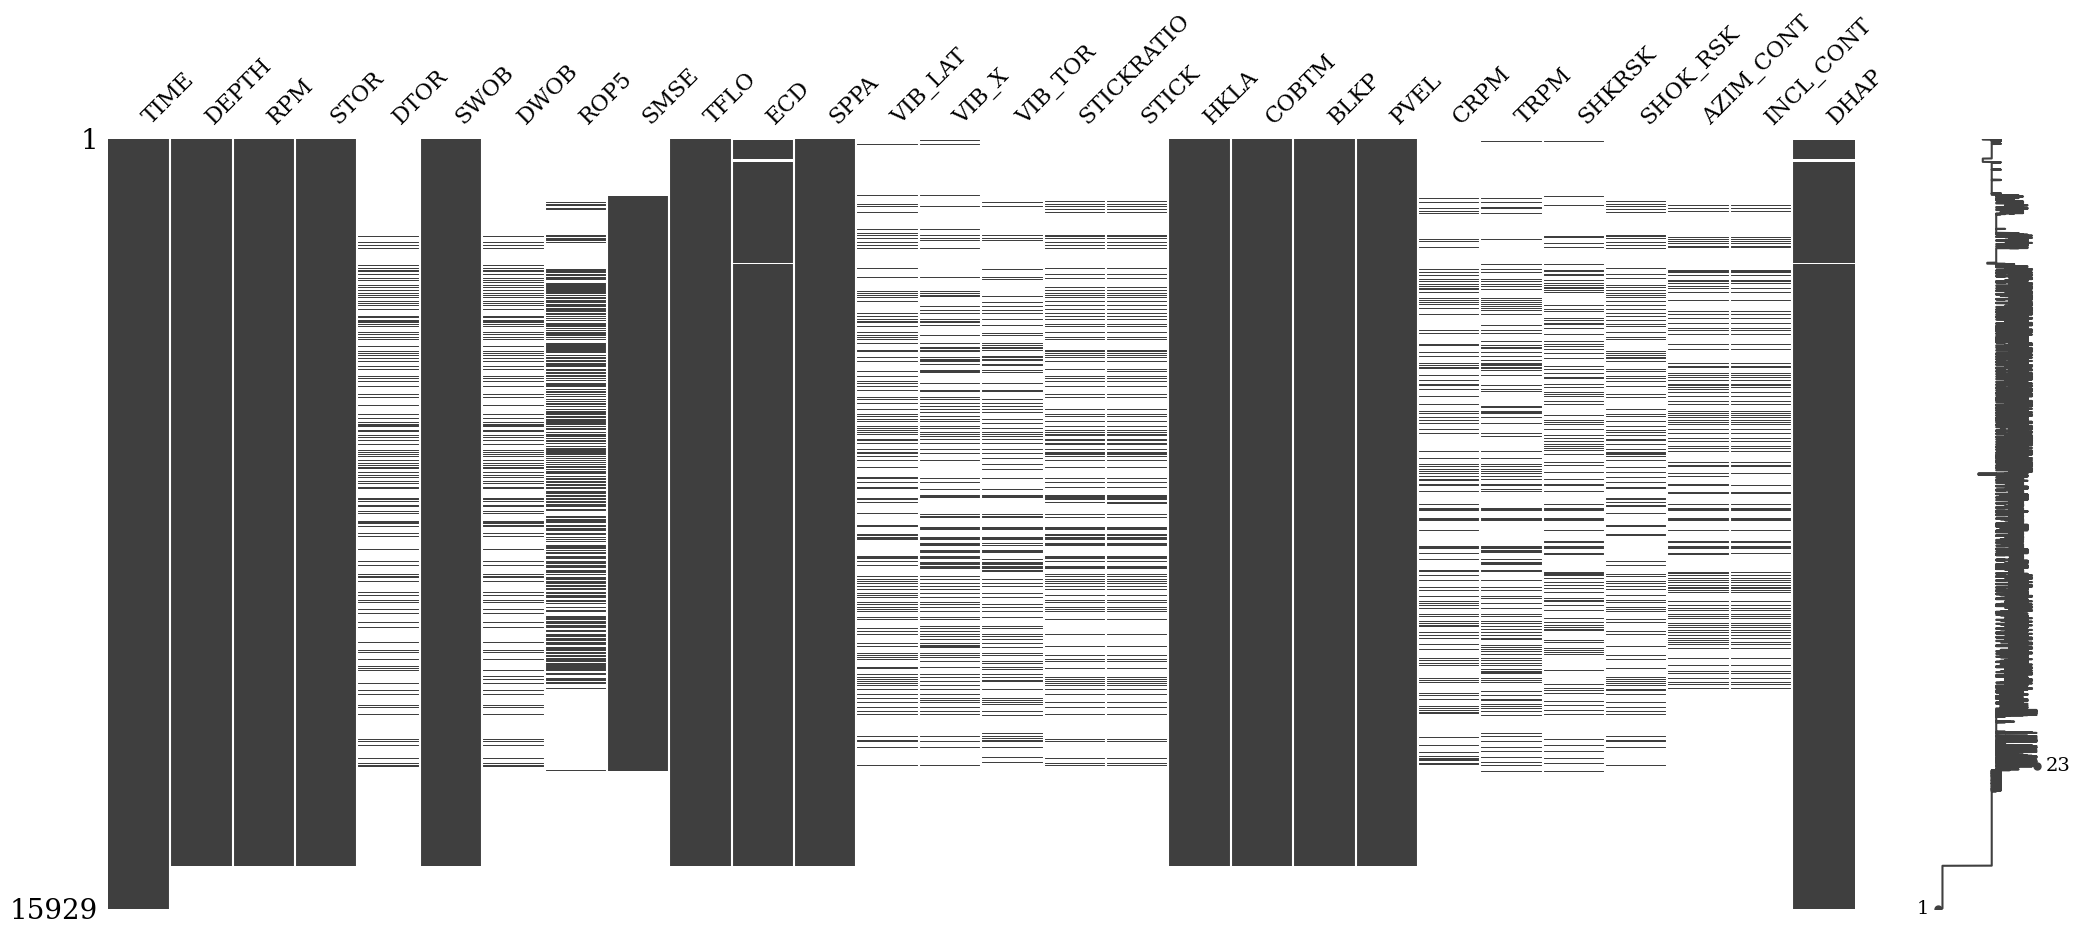

In [234]:
msno.matrix(well311)

The first index coloum shows the Epoch time based on 1900. We will ignore this index since we have a seperate TIME stamp within the dataframe

#### For the rest of the task, we will choose the following data points for our analysis

In [235]:
well311=well311[['TIME', 'DEPTH','SWOB', 'STOR', 'RPM', 'ROP5', 'SPPA', 'SMSE', 'TFLO', 'COBTM', 'ECD']]

In [236]:
# Let's have a look at the dataframe now , it seems that 'TIME_1900' still within the dataframe as index coloum

well311

TIME    DEPTH      SWOB    STOR   RPM  ROP5  \
TIME_1900                                                                 
41586.480278 2013-11-08 11:31:36  29.8812  110.4881  0.0000   0.0   NaN   
41586.480972 2013-11-08 11:32:36  53.1780  122.7929  0.0000   0.0   NaN   
41586.481667 2013-11-08 11:33:36  53.8603  123.9415  0.0678  20.0   NaN   
41586.482361 2013-11-08 11:34:36  52.6114  123.6583  0.0000   0.0   NaN   
41586.483056 2013-11-08 11:35:36  52.5203  121.8112  0.0000   0.0   NaN   
...                          ...      ...       ...     ...   ...   ...   
41597.538611 2013-11-19 12:55:36      NaN       NaN     NaN   NaN   NaN   
41597.539306 2013-11-19 12:56:36      NaN       NaN     NaN   NaN   NaN   
41597.540000 2013-11-19 12:57:36      NaN       NaN     NaN   NaN   NaN   
41597.540694 2013-11-19 12:58:36      NaN       NaN     NaN   NaN   NaN   
41597.541389 2013-11-19 12:59:36      NaN       NaN     NaN   NaN   NaN   

                  SPPA  SMSE  TFLO  COBTM  ECD  
TIME_1900                                       
41586.480278 -134.0341   NaN   0.0    1.0  NaN  
41586.480972 -134.0341   NaN   0.0    1.0  NaN  
41586.481667 -135.0683   NaN   0.0    1.0  NaN  
41586.482361 -135.4130   NaN   0.0    1.0  NaN  
41586.483056 -135.2062   NaN   0.0    1.0  NaN  
...                ...   ...   ...    ...  ...  
41597.538611       NaN   NaN   NaN    NaN  NaN  
41597.539306       NaN   NaN   NaN    NaN  NaN  
41597.540000       NaN   NaN   NaN    NaN  NaN  
41597.540694       NaN   NaN   NaN    NaN  NaN  
41597.541389       NaN   NaN   NaN    NaN  NaN  

[15929 rows x 11 columns]

In [237]:
# Now we will reset the index to drop the  'TIME_1900' coloumn

# well311 = well311.reset_index(drop = True)

In [238]:
well311

TIME    DEPTH      SWOB    STOR   RPM  ROP5  \
TIME_1900                                                                 
41586.480278 2013-11-08 11:31:36  29.8812  110.4881  0.0000   0.0   NaN   
41586.480972 2013-11-08 11:32:36  53.1780  122.7929  0.0000   0.0   NaN   
41586.481667 2013-11-08 11:33:36  53.8603  123.9415  0.0678  20.0   NaN   
41586.482361 2013-11-08 11:34:36  52.6114  123.6583  0.0000   0.0   NaN   
41586.483056 2013-11-08 11:35:36  52.5203  121.8112  0.0000   0.0   NaN   
...                          ...      ...       ...     ...   ...   ...   
41597.538611 2013-11-19 12:55:36      NaN       NaN     NaN   NaN   NaN   
41597.539306 2013-11-19 12:56:36      NaN       NaN     NaN   NaN   NaN   
41597.540000 2013-11-19 12:57:36      NaN       NaN     NaN   NaN   NaN   
41597.540694 2013-11-19 12:58:36      NaN       NaN     NaN   NaN   NaN   
41597.541389 2013-11-19 12:59:36      NaN       NaN     NaN   NaN   NaN   

                  SPPA  SMSE  TFLO  COBTM  ECD  
TIME_1900                                       
41586.480278 -134.0341   NaN   0.0    1.0  NaN  
41586.480972 -134.0341   NaN   0.0    1.0  NaN  
41586.481667 -135.0683   NaN   0.0    1.0  NaN  
41586.482361 -135.4130   NaN   0.0    1.0  NaN  
41586.483056 -135.2062   NaN   0.0    1.0  NaN  
...                ...   ...   ...    ...  ...  
41597.538611       NaN   NaN   NaN    NaN  NaN  
41597.539306       NaN   NaN   NaN    NaN  NaN  
41597.540000       NaN   NaN   NaN    NaN  NaN  
41597.540694       NaN   NaN   NaN    NaN  NaN  
41597.541389       NaN   NaN   NaN    NaN  NaN  

[15929 rows x 11 columns]

In [239]:
# Check total number of NaN values()
well311.isnull().sum()

TIME         0
DEPTH      885
SWOB       885
STOR       890
RPM        890
ROP5     10150
SPPA       890
SMSE      4046
TFLO       890
COBTM      885
ECD       1003
dtype: int64

In [240]:
# Now at this point, we want to see the data distribution in a simple subplot

# This will help us to get a quick overview of all data profile and possible outliers in data with qucik visual. For example, if you see ECD profile, it shows a very high spike in data at around 600 meter DEPTH

# well311.plot(subplots=True, figsize=(15, 20))
# plt.show()

In [241]:
import matplotlib.pyplot as plt

#### Draw time vs depth profile

This will show complete drilling activities for this section (311 mm section)

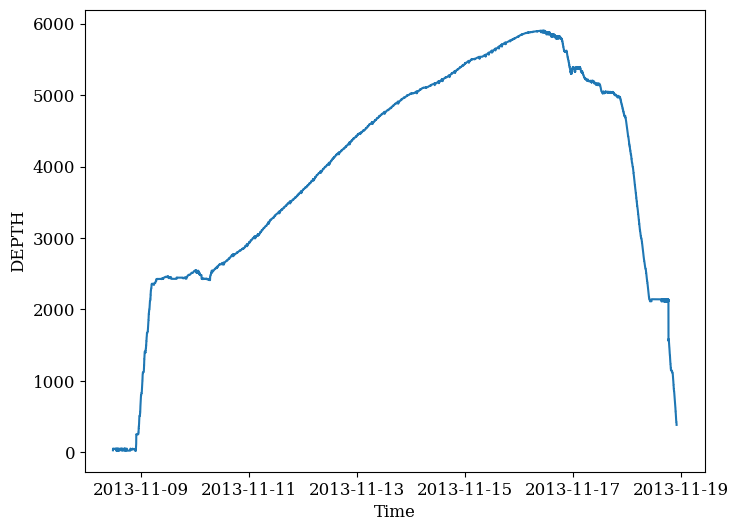

In [242]:
plt.figure(figsize=(8,6))
import matplotlib
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : 10}

plt.plot(well311.TIME, well311.DEPTH)
plt.xlabel('Time')
plt.ylabel('DEPTH')

plt.show()

In [243]:
well311

TIME    DEPTH      SWOB    STOR   RPM  ROP5  \
TIME_1900                                                                 
41586.480278 2013-11-08 11:31:36  29.8812  110.4881  0.0000   0.0   NaN   
41586.480972 2013-11-08 11:32:36  53.1780  122.7929  0.0000   0.0   NaN   
41586.481667 2013-11-08 11:33:36  53.8603  123.9415  0.0678  20.0   NaN   
41586.482361 2013-11-08 11:34:36  52.6114  123.6583  0.0000   0.0   NaN   
41586.483056 2013-11-08 11:35:36  52.5203  121.8112  0.0000   0.0   NaN   
...                          ...      ...       ...     ...   ...   ...   
41597.538611 2013-11-19 12:55:36      NaN       NaN     NaN   NaN   NaN   
41597.539306 2013-11-19 12:56:36      NaN       NaN     NaN   NaN   NaN   
41597.540000 2013-11-19 12:57:36      NaN       NaN     NaN   NaN   NaN   
41597.540694 2013-11-19 12:58:36      NaN       NaN     NaN   NaN   NaN   
41597.541389 2013-11-19 12:59:36      NaN       NaN     NaN   NaN   NaN   

                  SPPA  SMSE  TFLO  COBTM  ECD  
TIME_1900                                       
41586.480278 -134.0341   NaN   0.0    1.0  NaN  
41586.480972 -134.0341   NaN   0.0    1.0  NaN  
41586.481667 -135.0683   NaN   0.0    1.0  NaN  
41586.482361 -135.4130   NaN   0.0    1.0  NaN  
41586.483056 -135.2062   NaN   0.0    1.0  NaN  
...                ...   ...   ...    ...  ...  
41597.538611       NaN   NaN   NaN    NaN  NaN  
41597.539306       NaN   NaN   NaN    NaN  NaN  
41597.540000       NaN   NaN   NaN    NaN  NaN  
41597.540694       NaN   NaN   NaN    NaN  NaN  
41597.541389       NaN   NaN   NaN    NaN  NaN  

[15929 rows x 11 columns]

The above figure shows an inverted view of the drilling activity with time. We will use 'plt.gca().invert_yaxis()' function to invert the y axis

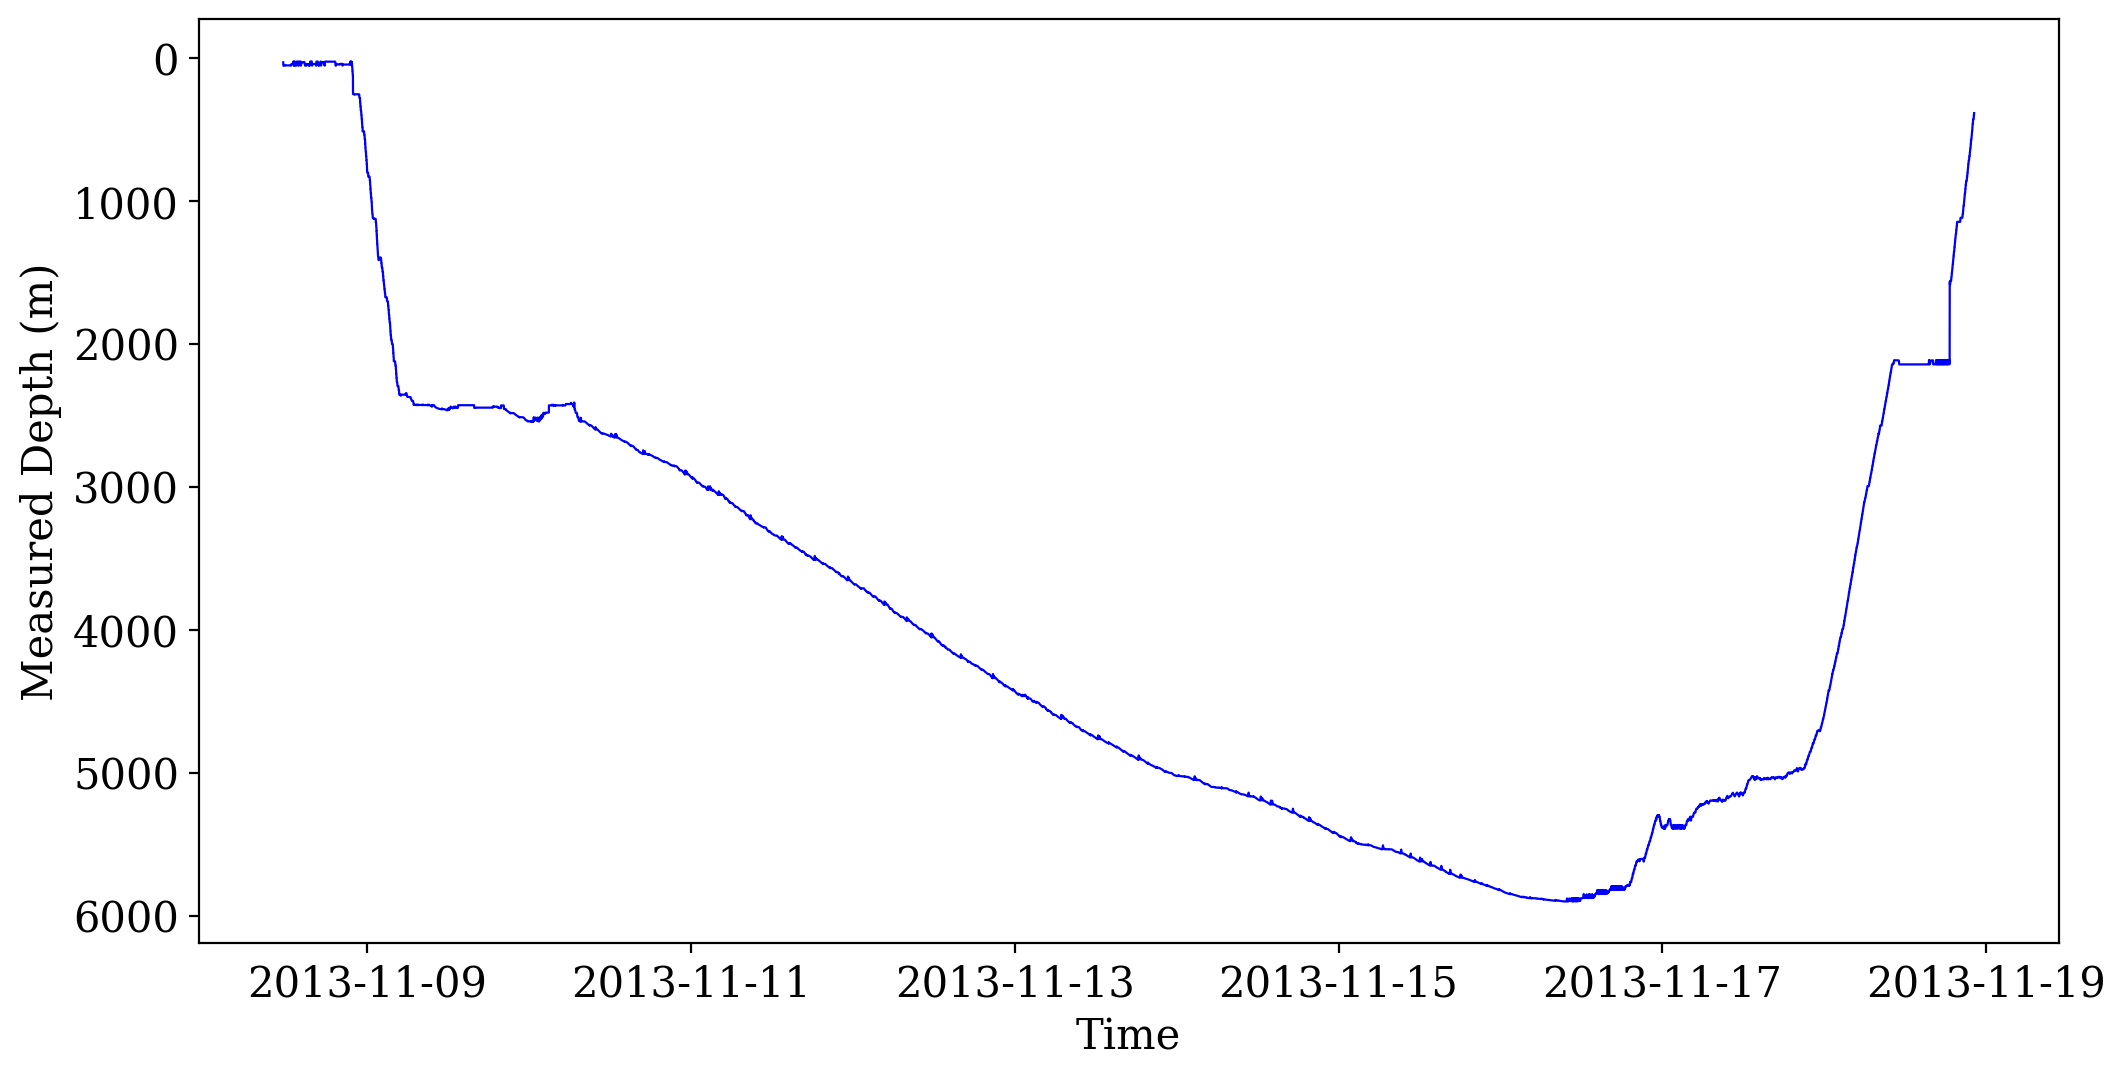

In [244]:
plt.figure(figsize=(12,6), dpi = 200)
import matplotlib
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : 15}
matplotlib.rc('font', **font)



plt.plot(well311.TIME, well311.DEPTH, lw= 0.8, color = 'blue')
plt.xlabel('Time')
plt.ylabel('Measured Depth (m)')
plt.gca().invert_yaxis()


# plt.text('2013-11-08 11:35:36', 1800, 'Run in Hole', fontsize = 12, rotation=100, color ='red')


# plt.text("2013-11-08 17:35:36", 1800, 'Run in Hole', fontsize = 12, rotation=100, color ='red')

#plt.text("2013-11-08 17:35:36", 1800, 'Run in Hole', fontsize = 12, rotation=100, color ='red')


# plt.text("2013-11-09 06:35:36", 2300, 'Casing Pressure \n Test and LOT', fontsize = 12, rotation=0, color ='red')

# plt.text("2013-11-12 12:35:36", 4400, 'Drilling', fontsize = 12, rotation=330, color ='red')

# plt.text("2013-11-17 00:35:36", 5700, 'Hole Conditioning', fontsize = 12, rotation=0, color ='red')

# plt.text("2013-11-18 03:35:36", 4500, 'Pull out of Hole', fontsize = 12, rotation=80, color ='red')

# plt.text("2013-11-17 00:35:36", 2300, 'Flow Check at\n Casing Shoe', fontsize = 12, rotation=0, color ='red')

# plt.text("2013-11-18 20:35:36", 2000, 'Pull to Surface', fontsize = 12, rotation=83, color ='red')

### The above figure contains both drilling and non drilling activities with time. Therefore, we will seperate drilling data from non drilling activity

### Seperate drilling and not drilling data

In this dataset We will consider an operation as drilling when Rate of Penetration (ROP5), Surface Weight on Bit (SWOB) and Rotary Speed (RPM) has a positive value.

Also, Composite On Bottom Status= 0 represents a drilling state

We will rename drilling data as df

In [245]:
df = well311[(well311['ROP5']>0) & (well311['SWOB']>0) & (well311['RPM']>0)& (well311['COBTM']==0)]

In [246]:
df.head(20)

TIME      DEPTH     SWOB     STOR   RPM     ROP5  \
TIME_1900                                                                      
41587.302500 2013-11-09 07:15:36  2427.5371  14.3337   6.7791  40.0   4.8685   
41587.387222 2013-11-09 09:17:36  2429.7649   1.2809  13.2328  99.0  15.8604   
41587.387917 2013-11-09 09:18:36  2430.2273   2.6199  14.1276  81.0  22.3100   
41587.388611 2013-11-09 09:19:36  2430.7432   2.5669  13.9649  82.0  27.7772   
41587.389306 2013-11-09 09:20:36  2431.4077   3.6538  16.5139  81.0  32.4092   
41587.390000 2013-11-09 09:21:36  2432.1660   2.4310  15.9851  78.0  42.0161   
41587.391389 2013-11-09 09:23:36  2432.8196   0.6854  12.1617  81.0  29.5946   
41587.392083 2013-11-09 09:24:36  2433.2854   1.7265  13.5175  81.0  26.3219   
41587.392778 2013-11-09 09:25:36  2433.8711   2.3083  14.8327  82.0  24.4529   
41587.393472 2013-11-09 09:26:36  2434.4495   3.0530  15.9987  81.0  32.7973   
41587.394167 2013-11-09 09:27:36  2435.0645   3.8900  16.6766  80.0  37.3998   
41587.394861 2013-11-09 09:28:36  2435.3816   2.4001  13.0294  83.0  30.2746   
41587.395556 2013-11-09 09:29:36  2435.8188   2.8445  15.2530  82.0  28.1709   
41587.396250 2013-11-09 09:30:36  2436.4143   4.4425  16.9884  80.0  27.1694   
41587.396944 2013-11-09 09:31:36  2436.9470   3.7602  16.4596  81.0  31.8522   
41587.397639 2013-11-09 09:32:36  2437.4036   2.8674  13.3955  81.0  31.5846   
41587.417083 2013-11-09 10:00:36  2438.7104   0.3425  14.3581  79.0  26.8639   
41587.417778 2013-11-09 10:01:36  2439.3857   3.2522  15.9851  80.0  31.7406   
41587.418472 2013-11-09 10:02:36  2439.9719   1.5822  16.4868  79.0  33.2450   
41587.419167 2013-11-09 10:03:36  2440.6602   3.2468  17.6256  78.0  39.2455   

                  SPPA     SMSE      TFLO  COBTM       ECD  
TIME_1900                                                   
41587.302500  13306.61   1.6884  2775.691    0.0  1500.823  
41587.387222  12618.78  15.0119  2819.716    0.0  1467.436  
41587.387917  13522.76  11.9149  3000.393    0.0  1466.613  
41587.388611  13537.10   9.0085  2978.816    0.0  1467.561  
41587.389306  13529.93   7.8089  3003.081    0.0  1467.761  
41587.390000  13531.51   6.9210  2988.697    0.0  1468.295  
41587.391389  13512.69  15.1515  3035.446    0.0  1467.070  
41587.392083  13508.69  10.3811  3017.466    0.0  1466.960  
41587.392778  13510.07   8.4881  3005.806    0.0  1466.821  
41587.393472  13505.31   8.6495  3003.990    0.0  1467.398  
41587.394167  13504.28   7.7820  2977.037    0.0  1466.895  
41587.394861  13474.42  16.1135  3021.062    0.0  1466.107  
41587.395556  13446.09  12.7318  2982.413    0.0  1465.290  
41587.396250  13428.78   8.9959  3009.403    0.0  1464.079  
41587.396944  13422.92  10.1721  3041.730    0.0  1464.310  
41587.397639  13386.03  11.4130  3009.403    0.0  1461.706  
41587.417083  13568.05  12.9057  3075.004    0.0  1450.703  
41587.417778  13565.57   8.5001  3077.691    0.0  1449.119  
41587.418472  13532.62   8.9109  3058.840    0.0  1447.556  
41587.419167  13496.14   7.0391  3069.628    0.0  1447.395

In [247]:
# Check the index row, we get scattered rows. Therefore we will reset index

df.reset_index(drop=True, inplace = True)

### Plot active drilling data

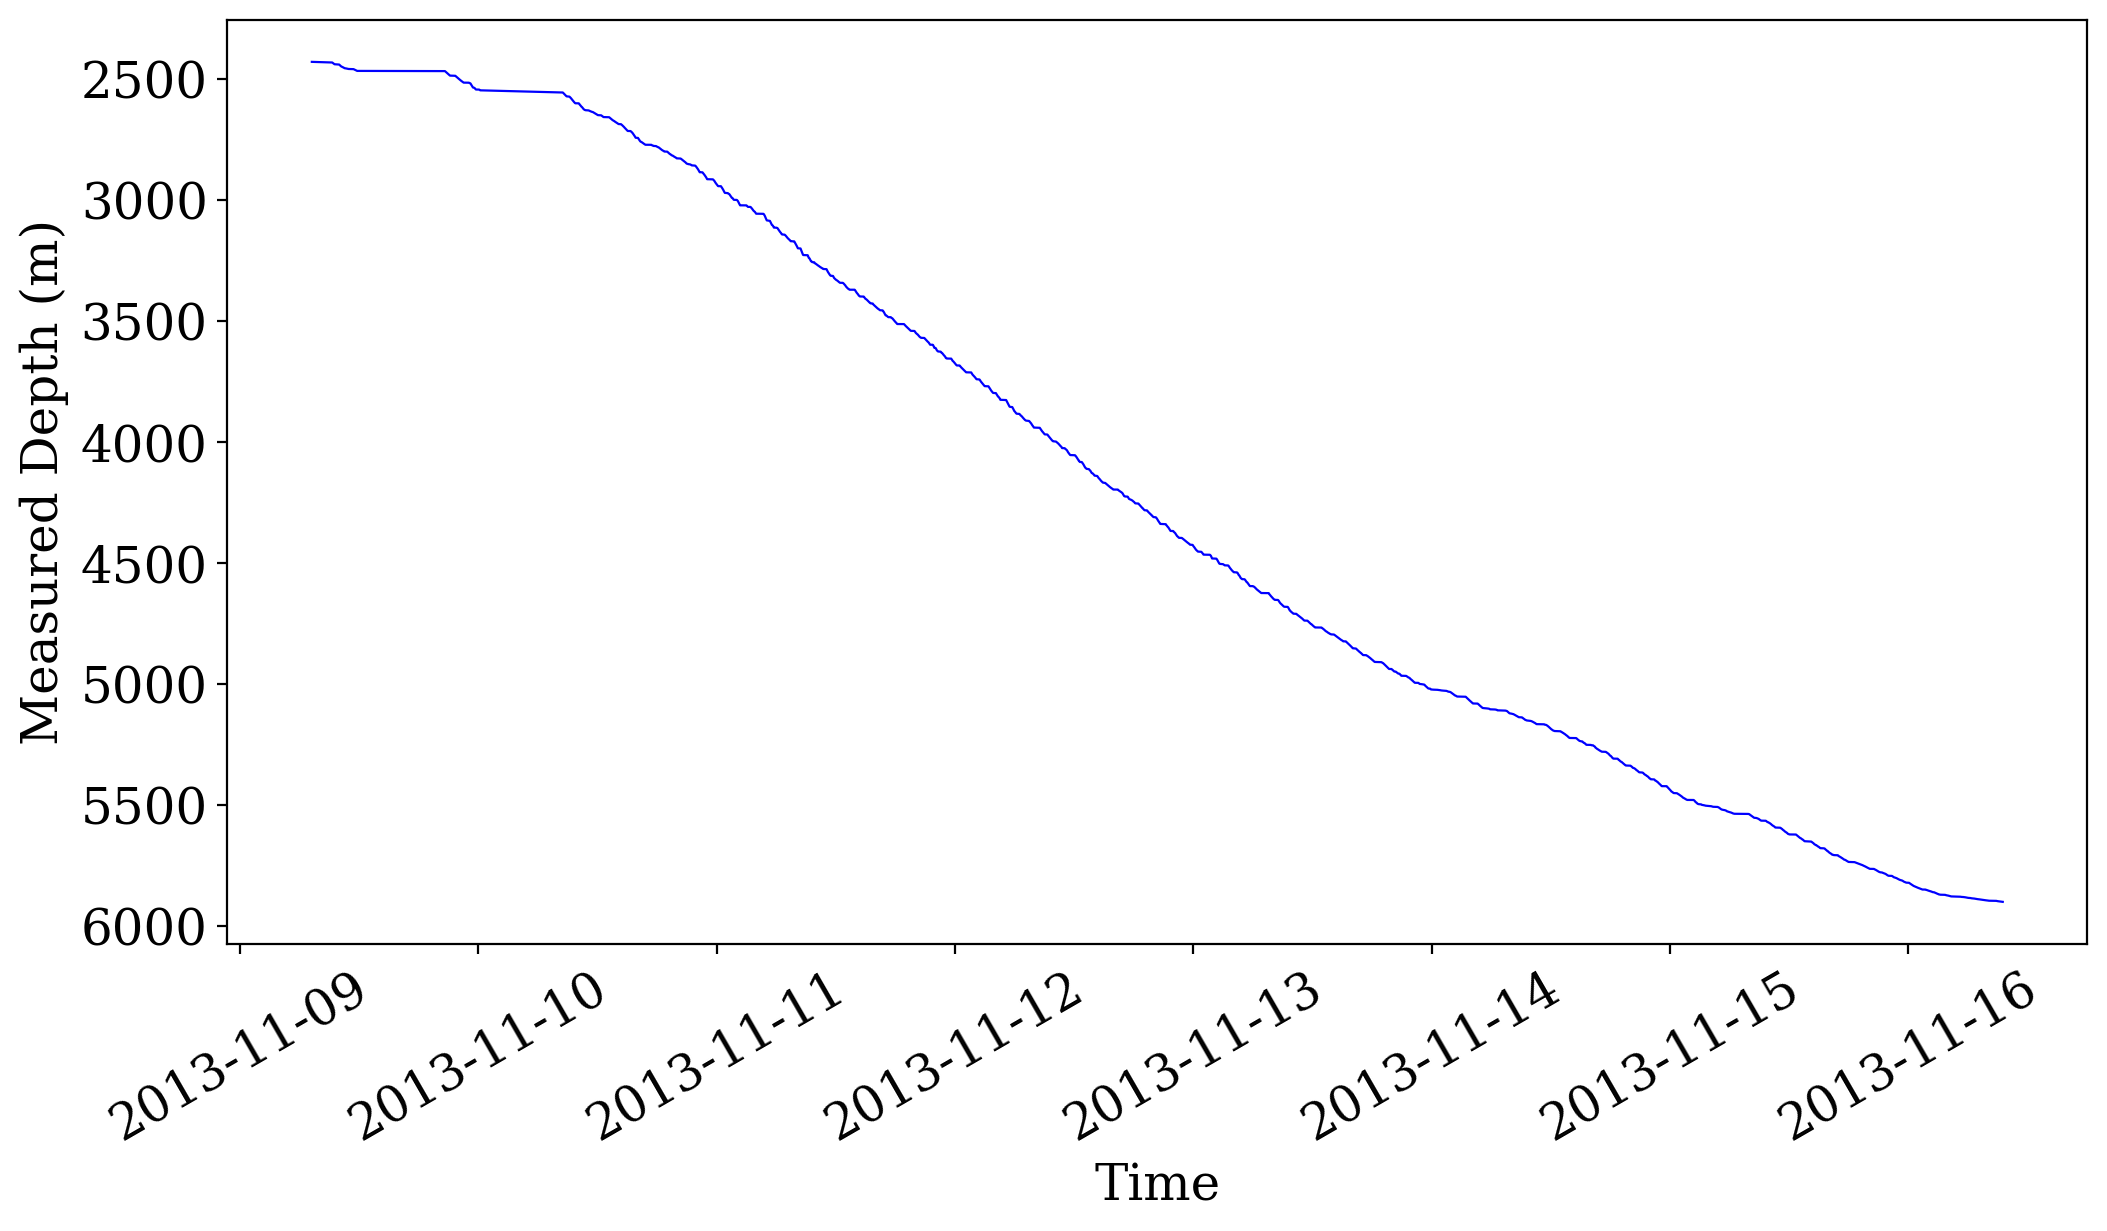

In [248]:
# df dataset only contain drilling data. Now we will plot depth vs time plot again to see actial drilling time and depth
plt.figure(figsize=(12,6), dpi = 200)
import matplotlib
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : 18}
matplotlib.rc('font', **font)

plt.plot(df.TIME, df.DEPTH, lw= 0.8, color = 'blue')
plt.xlabel('Time')
plt.ylabel('Measured Depth (m)')
plt.xticks(rotation=30)

# plt.text("2013-11-12 12:35:36", 4300, 'Drilling', fontsize = 12, rotation=325, color ='red')
plt.gca().invert_yaxis()

### Seperate data based on  Composite on Bottom Status

Alternatively we can seperate drilling and non drilling data by composite on bottom status. 

COBTM = 0 represent a drilling status

COBTM = 1 represent a non-drilling status

In [249]:
well311.COBTM.nunique()

2

In [250]:
well311.COBTM.unique()

array([ 1.,  0., nan])

In [251]:
# Drilling Data
df_COBTM_0= well311[well311['COBTM']==0]

In [252]:
df_COBTM_0.describe()

TIME        DEPTH         SWOB         STOR  \
count                           6933  6933.000000  6933.000000  6933.000000   
mean   2013-11-13 20:49:17.289484800  4334.837484    10.826162    29.725860   
min              2013-11-09 07:07:36   385.135700   -94.217900     0.000000   
25%              2013-11-11 22:16:36  3381.523200    10.814400    24.594500   
50%              2013-11-13 19:21:36  4598.869600    17.058200    33.326000   
75%              2013-11-15 14:13:36  5299.397900    22.603500    38.654400   
max              2013-11-18 22:14:36  5900.990700    57.395000    60.103400   
std                              NaN  1159.854030    22.062672    13.080287   

               RPM         ROP5          SPPA         SMSE         TFLO  \
count  6933.000000  5682.000000   6933.000000  6271.000000  6933.000000   
mean    143.246935    37.016594  21570.836029    62.910530  3219.901995   
min       0.000000     2.403700   -230.491700    -0.600500     0.000000   
25%     147.000000    23.900300  18868.470000    25.311950  3562.186000   
50%     162.000000    34.964950  24536.170000    37.558700  3629.604000   
75%     177.000000    46.647075  27385.770000    66.603100  3670.071000   
max     189.000000   133.698300  29270.860000   998.064100  3826.446000   
std      55.374020    19.074430   8401.916191    73.127006  1122.101221   

        COBTM          ECD  
count  6933.0  6932.000000  
mean      0.0  1490.075345  
min       0.0  1308.659000  
25%       0.0  1476.929500  
50%       0.0  1494.305500  
75%       0.0  1507.009250  
max       0.0  1597.154000  
std       0.0    32.429993

In [253]:
# Non- Drilling Dataa
df_COBTM_1= well311[well311['COBTM']==1]

In [254]:
df_COBTM_1.describe()

TIME        DEPTH         SWOB         STOR  \
count                           8111  8111.000000  8111.000000  8106.000000   
mean   2013-11-13 13:31:12.875847680  3598.494426    13.536553     8.749850   
min              2013-11-08 11:31:36    23.739300  -102.407700     0.000000   
25%              2013-11-10 01:44:06  2428.948700     0.000000     0.000000   
50%              2013-11-13 11:25:36  3737.187700     0.633000     0.000000   
75%              2013-11-16 23:20:06  5194.556400    10.600650    18.571325   
max              2013-11-18 22:12:36  5900.983400   177.117000    63.303100   
std                              NaN  1775.213151    42.479407    13.076053   

               RPM        ROP5          SPPA         SMSE         TFLO  \
count  8106.000000   97.000000   8106.000000  5612.000000  8106.000000   
mean     38.026277   38.426108  11018.740694    55.646027  1682.932544   
min       0.000000    2.420600   -228.009600    -0.666600     0.000000   
25%       0.000000   26.119900     58.674400     0.000000     0.000000   
50%       0.000000   35.115100   2215.458000     0.479700   803.586150   
75%      95.000000   47.445600  25192.787500    29.061275  3605.340000   
max     187.000000  109.826900  32469.200000   582.433000  3885.763000   
std      54.283540   20.589197  12124.911380   106.645970  1722.165486   

        COBTM           ECD  
count  8111.0   7994.000000  
mean      1.0   1472.061111  
min       1.0      0.000000  
25%       1.0   1423.956000  
50%       1.0   1452.763500  
75%       1.0   1480.819000  
max       1.0  14181.390000  
std       0.0    434.314038

# Adding Geo Tag to the Surface Data

### In this steps we will add geological tag to the existing data.

Geological marker data available from  Hibernia 1638 END of Well Report.

End of well report available as 'Hibernia B-16 38 - End of Well Report' with file ID INV-124388. 


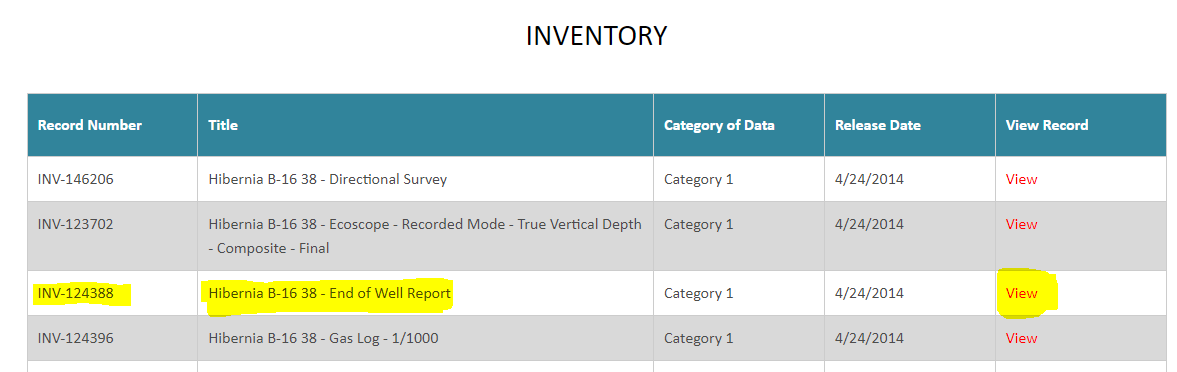

Downholad the file from this link https://home-cnlopb.hub.arcgis.com/pages/hibernia-b-16-38
    
Check pdf page numer 405 onwards 



In [255]:
# Geological Marker for Hibernia 1638

#create a function
def formation(DEPTH):
  
    
    if  DEPTH <= 1471:
        return 'Banquereau Formation'
              
    if 1471< DEPTH <= 3195:
        return 'Dawson Canyon Formation'
    
    if 3195 < DEPTH <= 3911:
        return 'Nautilus Formation'
        
    if 3911< DEPTH <= 5168:
        return 'Ben Nevis Formation'
    
    if 5168 < DEPTH <= 5487:
        return 'Avalon Formation'
    
    if 5487 < DEPTH <= 6401:
        return 'Whiterose Formation'
    
    if 6401 < DEPTH <= 6948:
        return 'Hibernia Formation'
        
    if 6948< DEPTH :
        return 'Fortune Bay Formation'
        
    else:
        return 'No Formation Label Found'

# create a new column based on condition
df['Formation'] = df['DEPTH'].apply(formation)



In [256]:
# Check the dataframe with Formation Tag

df

TIME      DEPTH     SWOB     STOR    RPM     ROP5  \
0    2013-11-09 07:15:36  2427.5371  14.3337   6.7791   40.0   4.8685   
1    2013-11-09 09:17:36  2429.7649   1.2809  13.2328   99.0  15.8604   
2    2013-11-09 09:18:36  2430.2273   2.6199  14.1276   81.0  22.3100   
3    2013-11-09 09:19:36  2430.7432   2.5669  13.9649   82.0  27.7772   
4    2013-11-09 09:20:36  2431.4077   3.6538  16.5139   81.0  32.4092   
...                  ...        ...      ...      ...    ...      ...   
5608 2013-11-16 09:20:36  5900.2856  24.0114  34.8581  162.0   6.0121   
5609 2013-11-16 09:22:36  5900.4902  23.0168  34.8988  162.0   6.1993   
5610 2013-11-16 09:23:36  5900.6245  23.7346  34.1259  163.0   6.1923   
5611 2013-11-16 09:24:36  5900.7095  23.6831  32.5261  161.0   6.1032   
5612 2013-11-16 09:29:36  5900.9453  20.2213  33.5429  161.0   5.0549   

          SPPA      SMSE      TFLO  COBTM       ECD                Formation  
0     13306.61    1.6884  2775.691    0.0  1500.823  Dawson Canyon Formation  
1     12618.78   15.0119  2819.716    0.0  1467.436  Dawson Canyon Formation  
2     13522.76   11.9149  3000.393    0.0  1466.613  Dawson Canyon Formation  
3     13537.10    9.0085  2978.816    0.0  1467.561  Dawson Canyon Formation  
4     13529.93    7.8089  3003.081    0.0  1467.761  Dawson Canyon Formation  
...        ...       ...       ...    ...       ...                      ...  
5608  27855.03  133.8819  3642.172    0.0  1471.615      Whiterose Formation  
5609  27768.01  290.1676  3599.056    0.0  1472.348      Whiterose Formation  
5610  27811.24  197.4735  3615.220    0.0  1471.682      Whiterose Formation  
5611  27831.38  190.6714  3631.421    0.0  1471.443      Whiterose Formation  
5612  27792.01  419.8892  3620.633    0.0  1471.552      Whiterose Formation  

[5613 rows x 12 columns]

In [257]:
# Check data types, Formation tag stored as 'object' 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5613 entries, 0 to 5612
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   TIME       5613 non-null   datetime64[ns]
 1   DEPTH      5613 non-null   float64       
 2   SWOB       5613 non-null   float64       
 3   STOR       5613 non-null   float64       
 4   RPM        5613 non-null   float64       
 5   ROP5       5613 non-null   float64       
 6   SPPA       5613 non-null   float64       
 7   SMSE       5613 non-null   float64       
 8   TFLO       5613 non-null   float64       
 9   COBTM      5613 non-null   float64       
 10  ECD        5613 non-null   float64       
 11  Formation  5613 non-null   object        
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 526.3+ KB


# Statistical Distribution

In [258]:
df.describe().transpose()

count                           mean                  min  \
TIME     5613  2013-11-13 05:37:13.413147904  2013-11-09 07:15:36   
DEPTH  5613.0                    4396.805206            2427.5371   
SWOB   5613.0                      18.351829               0.0171   
STOR   5613.0                      33.942317               6.7791   
RPM    5613.0                     163.461963                  1.0   
ROP5   5613.0                      37.060107               3.1332   
SPPA   5613.0                   24106.235461             12618.78   
SMSE   5613.0                      55.313884               0.3773   
TFLO   5613.0                    3612.365729             2461.086   
COBTM  5613.0                            0.0                  0.0   
ECD    5613.0                    1499.953169             1441.398   

                       25%                  50%                  75%  \
TIME   2013-11-11 16:22:36  2013-11-13 06:06:36  2013-11-14 20:13:36   
DEPTH            3451.9734            4597.8667            5346.0308   
SWOB               13.9853              18.3229              23.1142   
STOR               28.8789               35.075              39.7661   
RPM                  155.0                169.0                178.0   
ROP5               24.0674              34.9888              46.6473   
SPPA              21358.92             25081.61             27499.26   
SMSE               25.6328              36.8325              60.6591   
TFLO              3598.148             3639.484             3674.537   
COBTM                  0.0                  0.0                  0.0   
ECD               1487.164             1496.926             1515.019   

                       max          std  
TIME   2013-11-16 09:29:36          NaN  
DEPTH            5900.9453  1072.786238  
SWOB               40.7333     6.765678  
STOR               59.1815     8.028504  
RPM                  189.0    20.018875  
ROP5              133.6983    18.973053  
SPPA              29270.86  3925.575081  
SMSE               981.377    58.038318  
TFLO              3826.446   126.857467  
COBTM                  0.0          0.0  
ECD               1597.154    21.456975

In [259]:
# If we want to see description with catagorial data

df.describe(include='all')

TIME        DEPTH         SWOB         STOR  \
count                            5613  5613.000000  5613.000000  5613.000000   
unique                            NaN          NaN          NaN          NaN   
top                               NaN          NaN          NaN          NaN   
freq                              NaN          NaN          NaN          NaN   
mean    2013-11-13 05:37:13.413147904  4396.805206    18.351829    33.942317   
min               2013-11-09 07:15:36  2427.537100     0.017100     6.779100   
25%               2013-11-11 16:22:36  3451.973400    13.985300    28.878900   
50%               2013-11-13 06:06:36  4597.866700    18.322900    35.075000   
75%               2013-11-14 20:13:36  5346.030800    23.114200    39.766100   
max               2013-11-16 09:29:36  5900.945300    40.733300    59.181500   
std                               NaN  1072.786238     6.765678     8.028504   

                RPM         ROP5          SPPA         SMSE         TFLO  \
count   5613.000000  5613.000000   5613.000000  5613.000000  5613.000000   
unique          NaN          NaN           NaN          NaN          NaN   
top             NaN          NaN           NaN          NaN          NaN   
freq            NaN          NaN           NaN          NaN          NaN   
mean     163.461963    37.060107  24106.235461    55.313884  3612.365729   
min        1.000000     3.133200  12618.780000     0.377300  2461.086000   
25%      155.000000    24.067400  21358.920000    25.632800  3598.148000   
50%      169.000000    34.988800  25081.610000    36.832500  3639.484000   
75%      178.000000    46.647300  27499.260000    60.659100  3674.537000   
max      189.000000   133.698300  29270.860000   981.377000  3826.446000   
std       20.018875    18.973053   3925.575081    58.038318   126.857467   

         COBTM          ECD            Formation  
count   5613.0  5613.000000                 5613  
unique     NaN          NaN                    5  
top        NaN          NaN  Ben Nevis Formation  
freq       NaN          NaN                 1931  
mean       0.0  1499.953169                  NaN  
min        0.0  1441.398000                  NaN  
25%        0.0  1487.164000                  NaN  
50%        0.0  1496.926000                  NaN  
75%        0.0  1515.019000                  NaN  
max        0.0  1597.154000                  NaN  
std        0.0    21.456975                  NaN

In [260]:
pair_data = df[['SWOB', 'STOR', 'RPM', 'ROP5', 'SMSE']]

<Figure size 480x640 with 0 Axes>

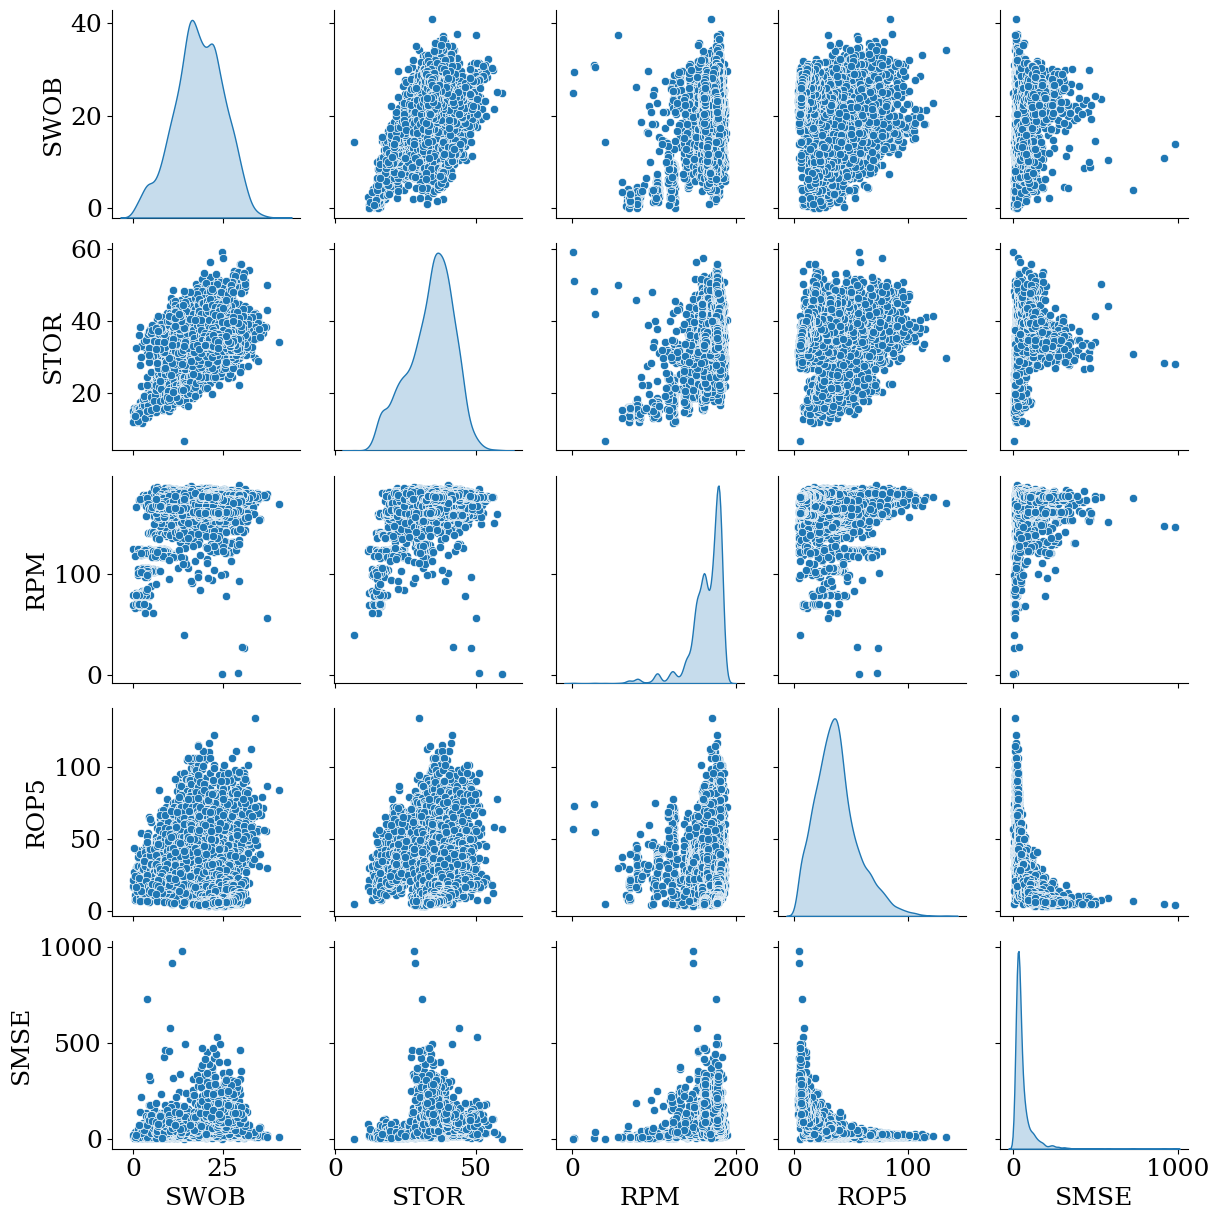

In [261]:
plt.figure(figsize=(6,8), dpi = 80)
g=sns.pairplot(pair_data,diag_kind="kde")
plot_kws={"s": 3}

# Statistical Distribution of Data

In this step, we will see boxplot and violin plot to see the data distribution. Also these plot help us to see outlier distribution

### Histogram

<Axes: xlabel='ROP5', ylabel='Count'>

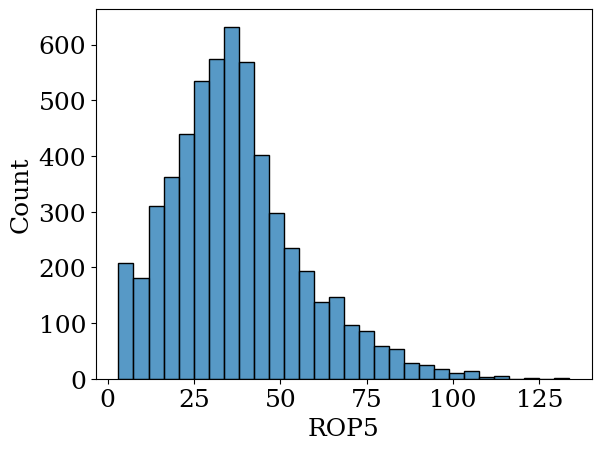

In [262]:
# Let us see the distribution of data point for ROP5. We can set bins size. In this figure, we set bin size = 30

sns.histplot(df.ROP5, bins =30)


# Boxplot

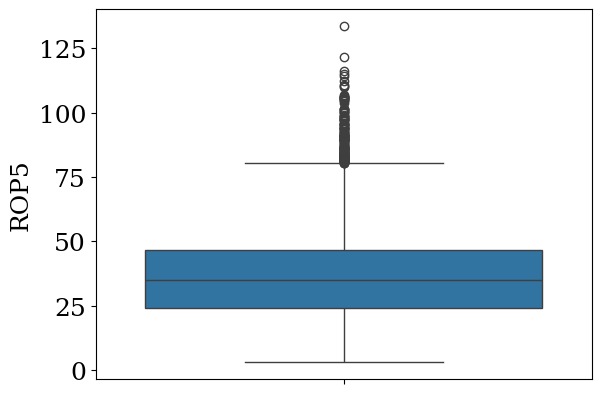

In [263]:
ax = sns.boxplot(y=df.ROP5)

# Violin Plot

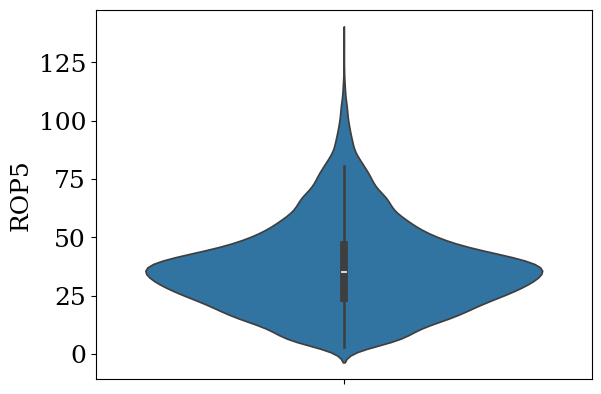

In [264]:
ax = sns.violinplot(y=df.ROP5)

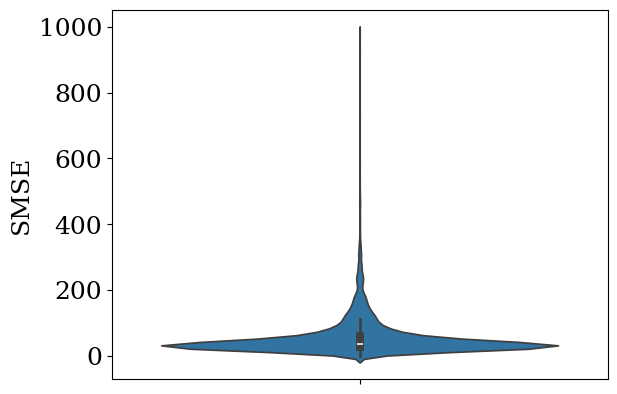

In [265]:
ax = sns.violinplot(y=df.SMSE)

### Check multiple catagorical data together

In this step, we will see the SWOB violin plot distribtion by formation

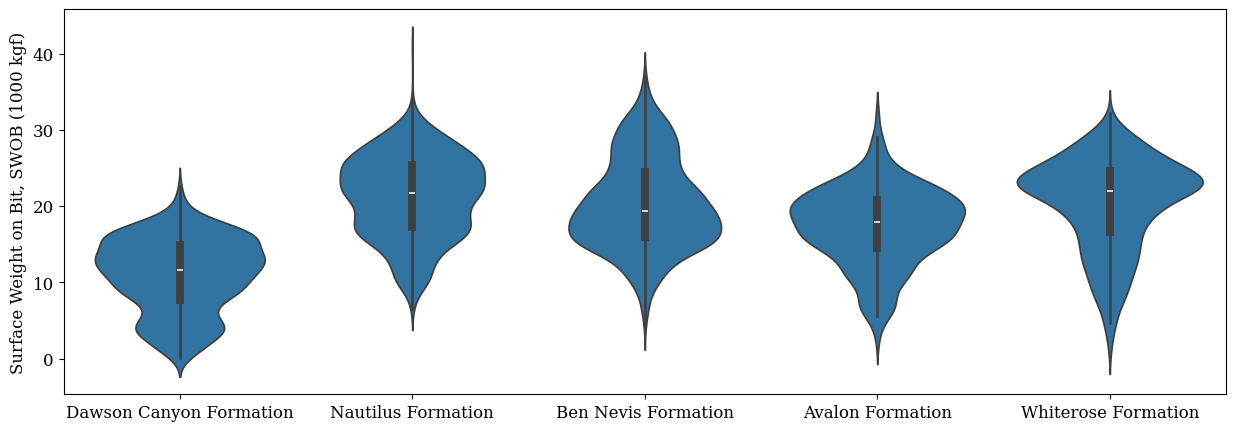

In [266]:

plt.figure(figsize=(15,5), dpi = 100)

import matplotlib
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : 12}

matplotlib.rc('font', **font)



plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax = sns.violinplot( y=df.SWOB, x=df.Formation)
# ax.set_title("Surface Weight On Bit (SWOB) by Formation")
# ax.set_xlabel("Name of the Formation")
ax.set_ylabel("Surface Weight on Bit, SWOB (1000 kgf)")
# ax.tight_layout()
ax.set(xlabel=None) 

# ax.set_xticklabels(rotation = 45)

plt.show()

# Scatter Plot

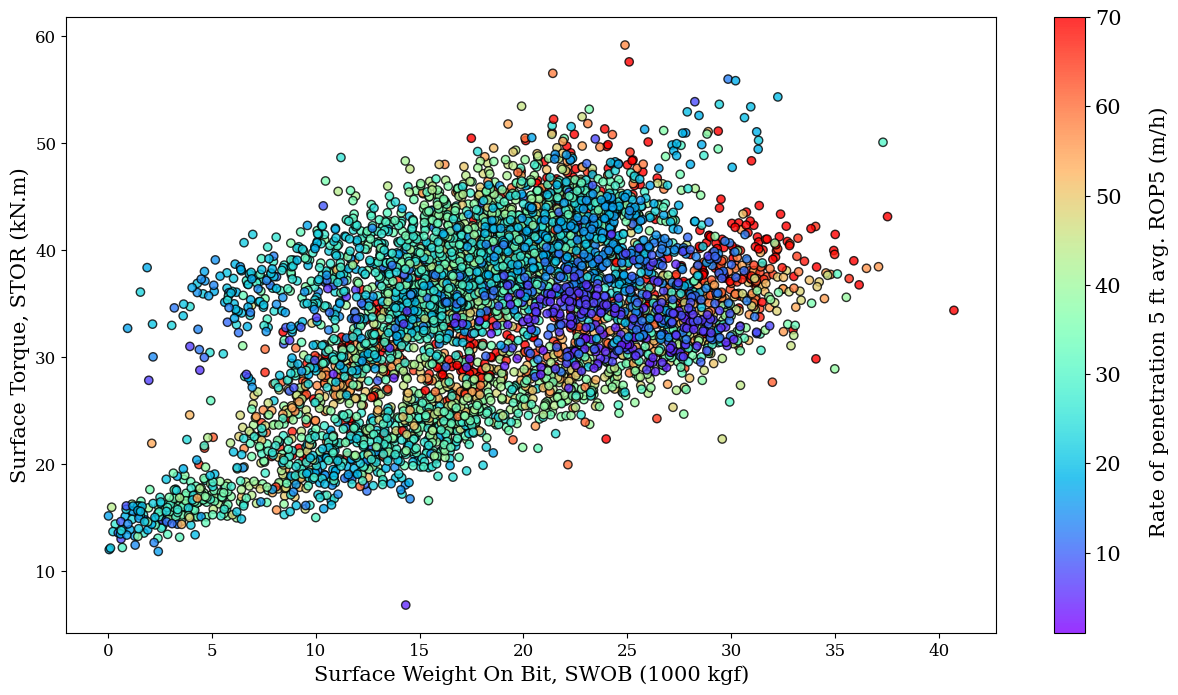

In [267]:
# This plot shows 'STOR' vs 'SWOB' distribution for all data points. 
# The color map shows the range of ROP5 within these two data set

plt.figure(figsize=(15,8))
import matplotlib
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : 15}

matplotlib.rc('font', **font)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Set up the scatter plot
plt.scatter(x='SWOB', y='STOR', data=df, c='ROP5', vmin=1, vmax=70,cmap='rainbow',alpha=0.8,edgecolors='black')




plt.colorbar(label='\n Rate of penetration 5 ft avg. ROP5 (m/h)')


plt.xlabel('Surface Weight On Bit, SWOB (1000 kgf)', fontsize=15)

plt.ylabel('Surface Torque, STOR (kN.m)', fontsize=15)

# plt.ylabel('STOR', fontsize=12)
# plt.xlabel('SWOB', fontsize=12)

plt.show()


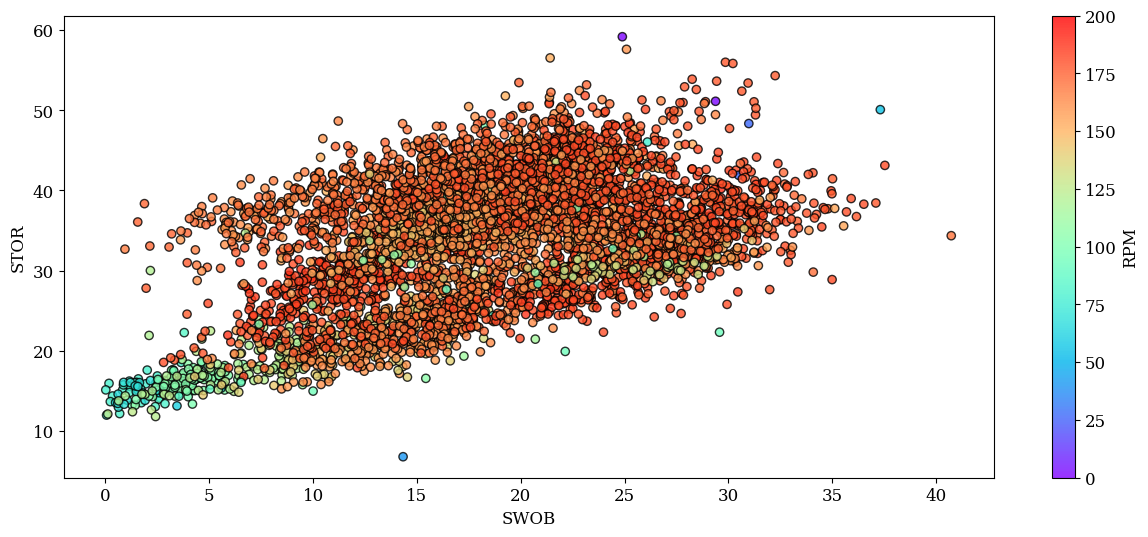

In [268]:
# This plot shows 'STOR' vs 'SWOB' distribution for all data points. 

# The color map shows the range of RPM within these two data set


plt.figure(figsize=(15,6))
import matplotlib
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : 12}

matplotlib.rc('font', **font)

# plt.style.use('bmh')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Set up the scatter plot
plt.scatter(x='SWOB', y='STOR', data=df, c='RPM', vmin=0, vmax=200,cmap='rainbow',alpha=0.8,edgecolors='black')

plt.colorbar(label='RPM')


# Add in labels for the axes
plt.ylabel('STOR', fontsize=12)
plt.xlabel('SWOB', fontsize=12)

plt.show()


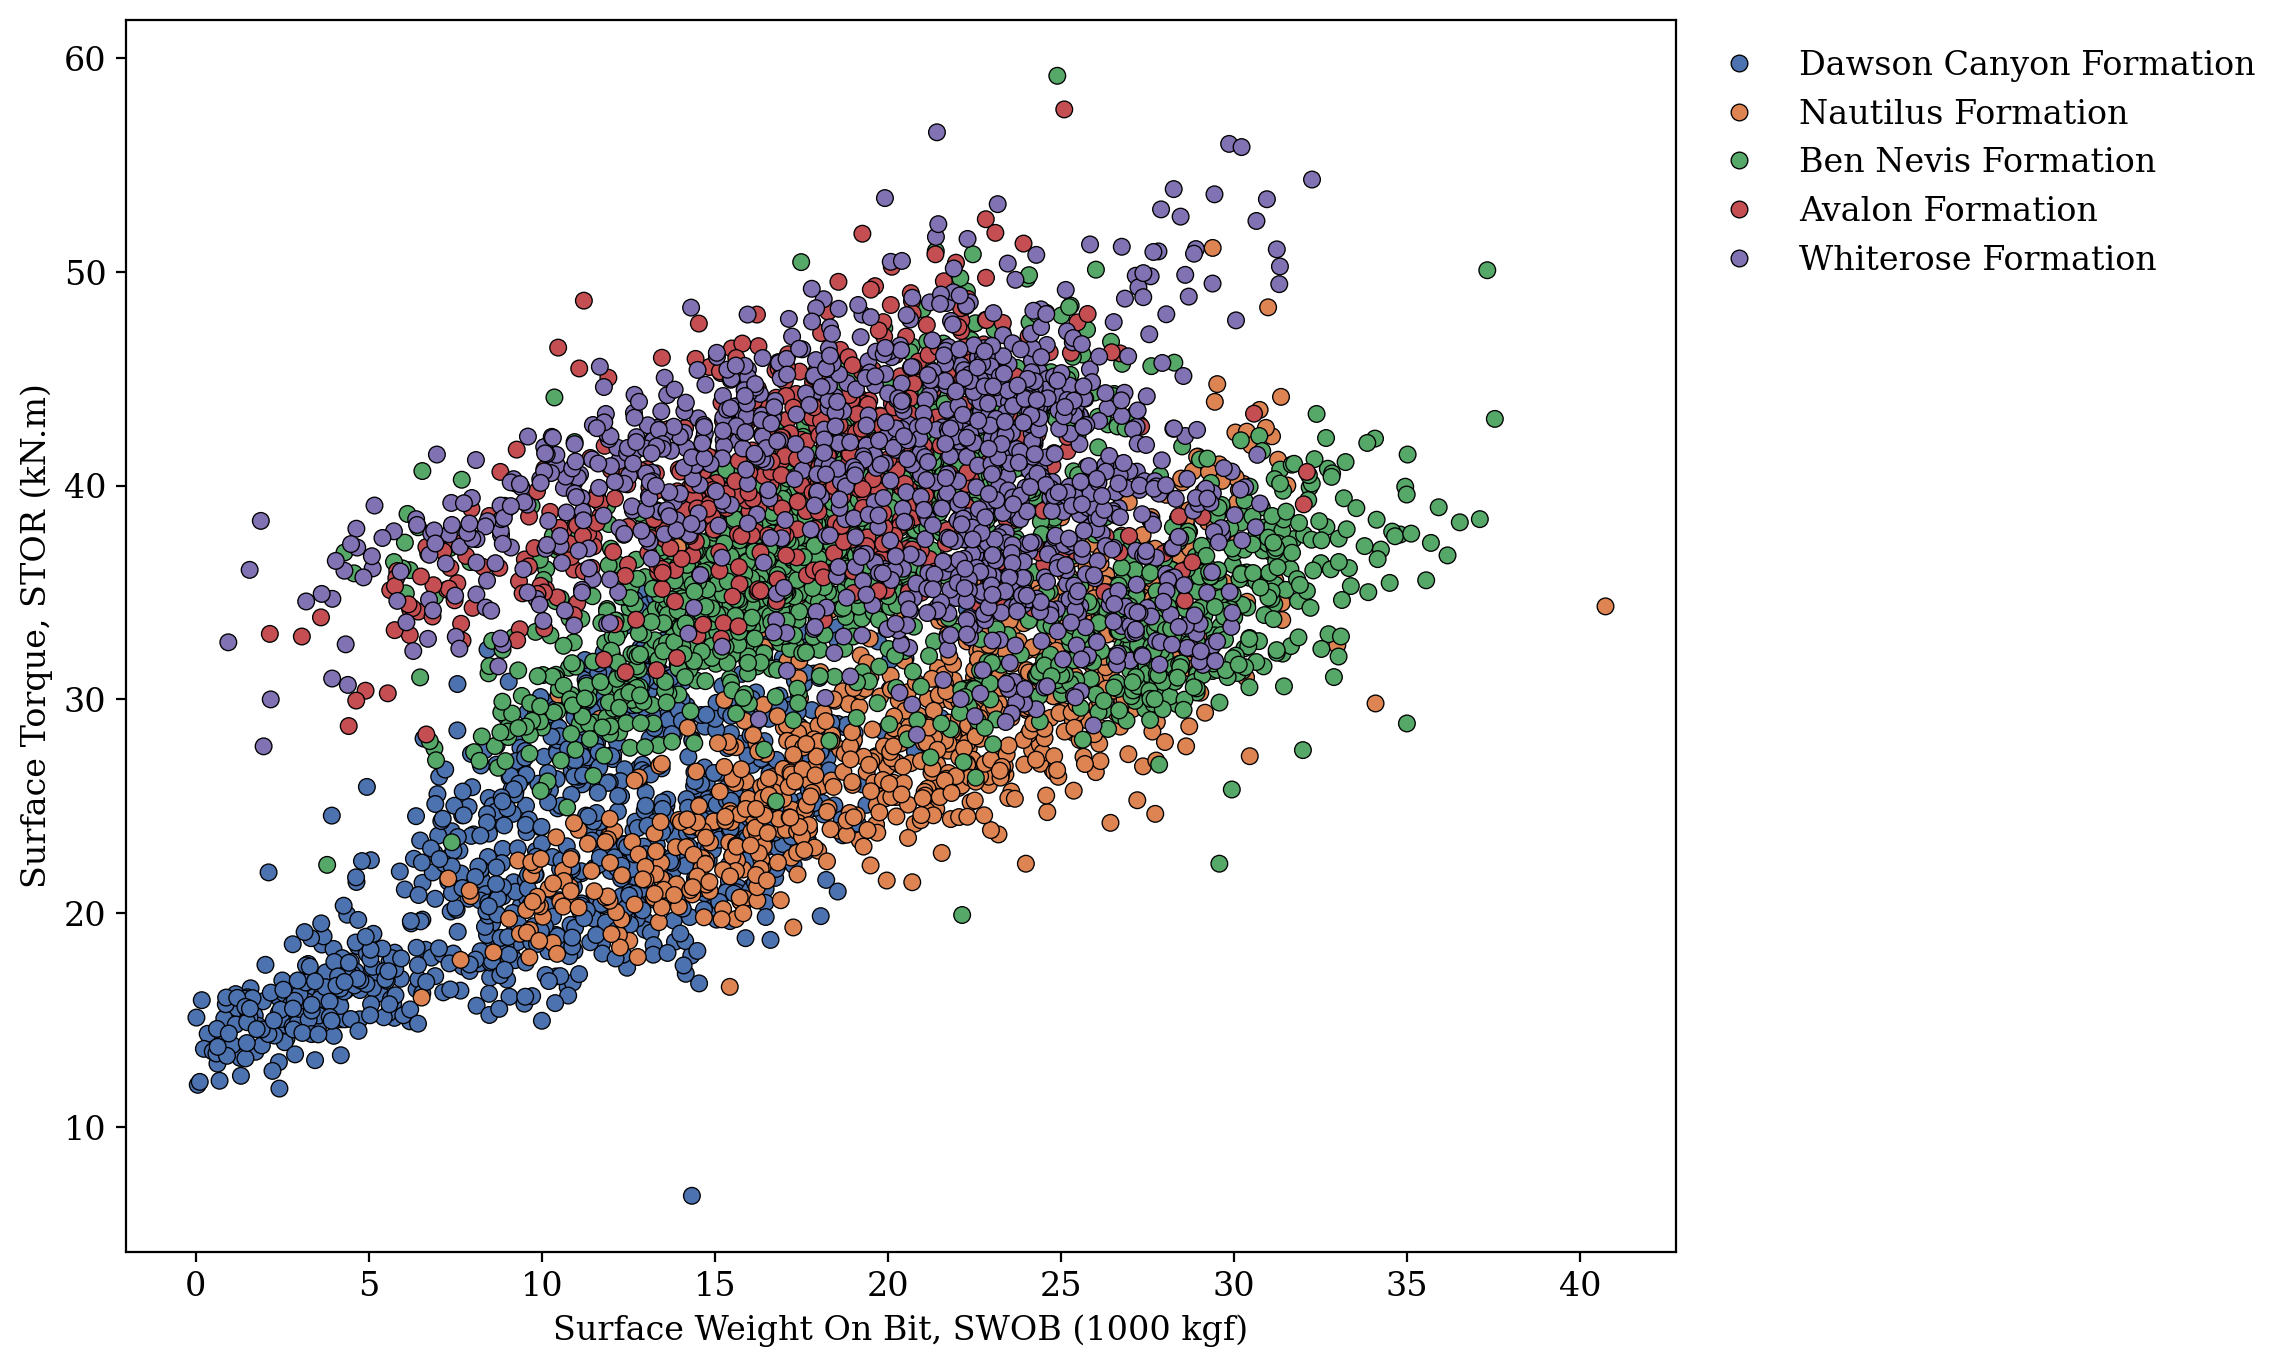

In [269]:

# Data points with different color shows the data from different formations
#

plt.figure(figsize=(10,8), dpi = 200)
import matplotlib
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : 12}


ax = sns.scatterplot(x='SWOB', y='STOR', data=df, edgecolors='black', hue = 'Formation',palette="deep")

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

leg = ax.legend()
leg.get_frame().set_edgecolor('b')
leg.get_frame().set_linewidth(0.0)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False)

ax.set_xlabel('Surface Weight On Bit, SWOB (1000 kgf)')

ax.set_ylabel('Surface Torque, STOR (kN.m)')

plt.show()



plt.show()


# Heatmanp

We will further reduce our datafrmae and see the correlation between the data points

Let us create a seperate dataframe as df2 with reduced dataset.

We will use df2.corr() function to get the correlation between data. 

Finally, we will use heatmap to visualize correlation 

In [270]:
df2 = df[[ 'DEPTH', 'SWOB', 'STOR', 'ROP5', 'RPM', 'SMSE', 'SPPA']]

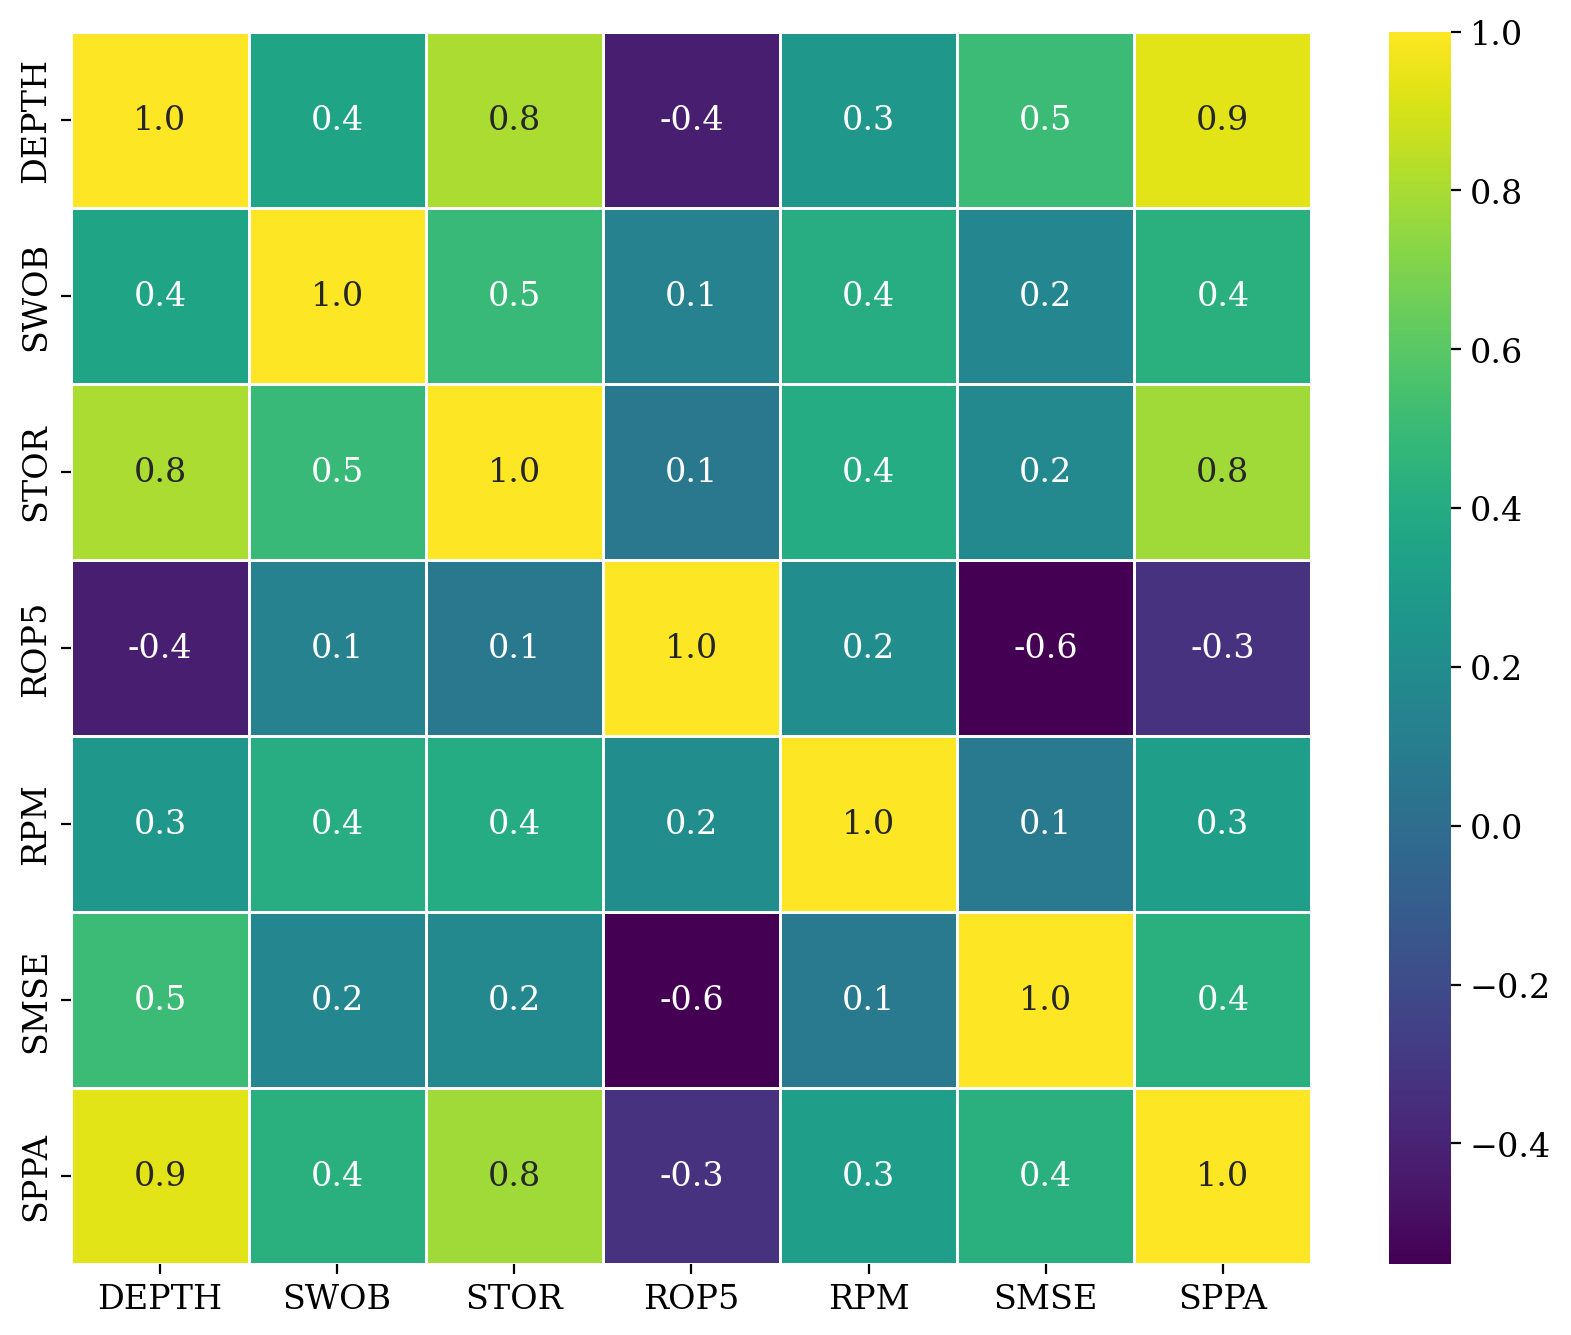

In [271]:
plt.figure(figsize=(10,8), dpi =200)
import matplotlib
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : 12}

matplotlib.rc('font', **font)


sns.heatmap(df2.corr(),annot=True,linewidth=.5, fmt=".1f",cmap="viridis")

plt.show()

# Averaging High Density Data

Raw field data shows lots of noise and sometime we need to smooth data with different signal processing. Let us see SWOB data with depth 



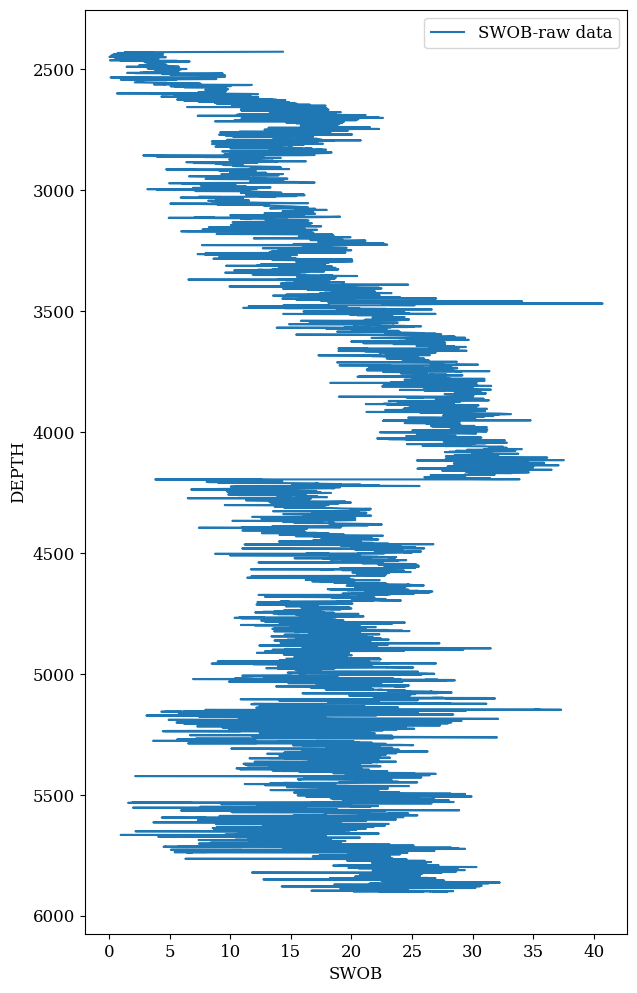

In [272]:
plt.figure(figsize=(7,12))
import matplotlib
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : 12}

matplotlib.rc('font', **font)

# plt.style.use('bmh')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Set up the scatter plot
plt.plot(df.SWOB, df.DEPTH,label = 'SWOB-raw data')

plt.xlabel('SWOB')
plt.ylabel('DEPTH')

plt.legend()

plt.gca().invert_yaxis()

Now we will use Rolling Mean function to smooth data. We set a rolling window of 50. This means SWOB data will be averaged over 50 data points.


We can plot both raw data and processed data together

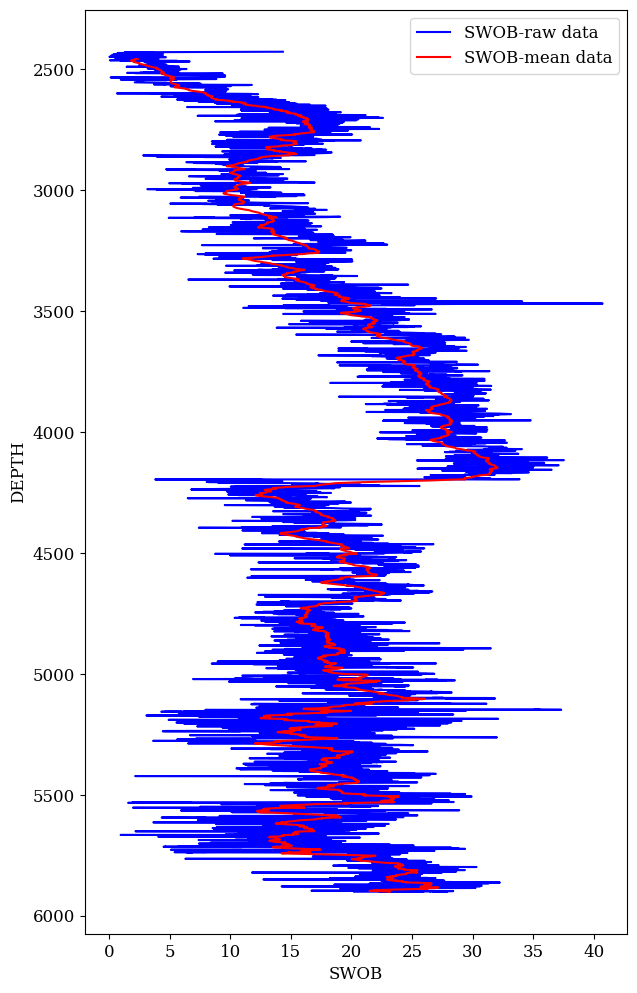

In [273]:
plt.figure(figsize=(7,12))
import matplotlib
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : 12}

matplotlib.rc('font', **font)

# plt.style.use('bmh')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Set up the scatter plot


plt.plot(df.SWOB, df.DEPTH, color ='blue', label = 'SWOB-raw data')

plt.plot(df.SWOB.rolling(window=50).mean(), df.DEPTH, color ='red', label = 'SWOB-mean data')

plt.legend()

plt.xlabel('SWOB')
plt.ylabel('DEPTH')

plt.gca().invert_yaxis()


# Subplot

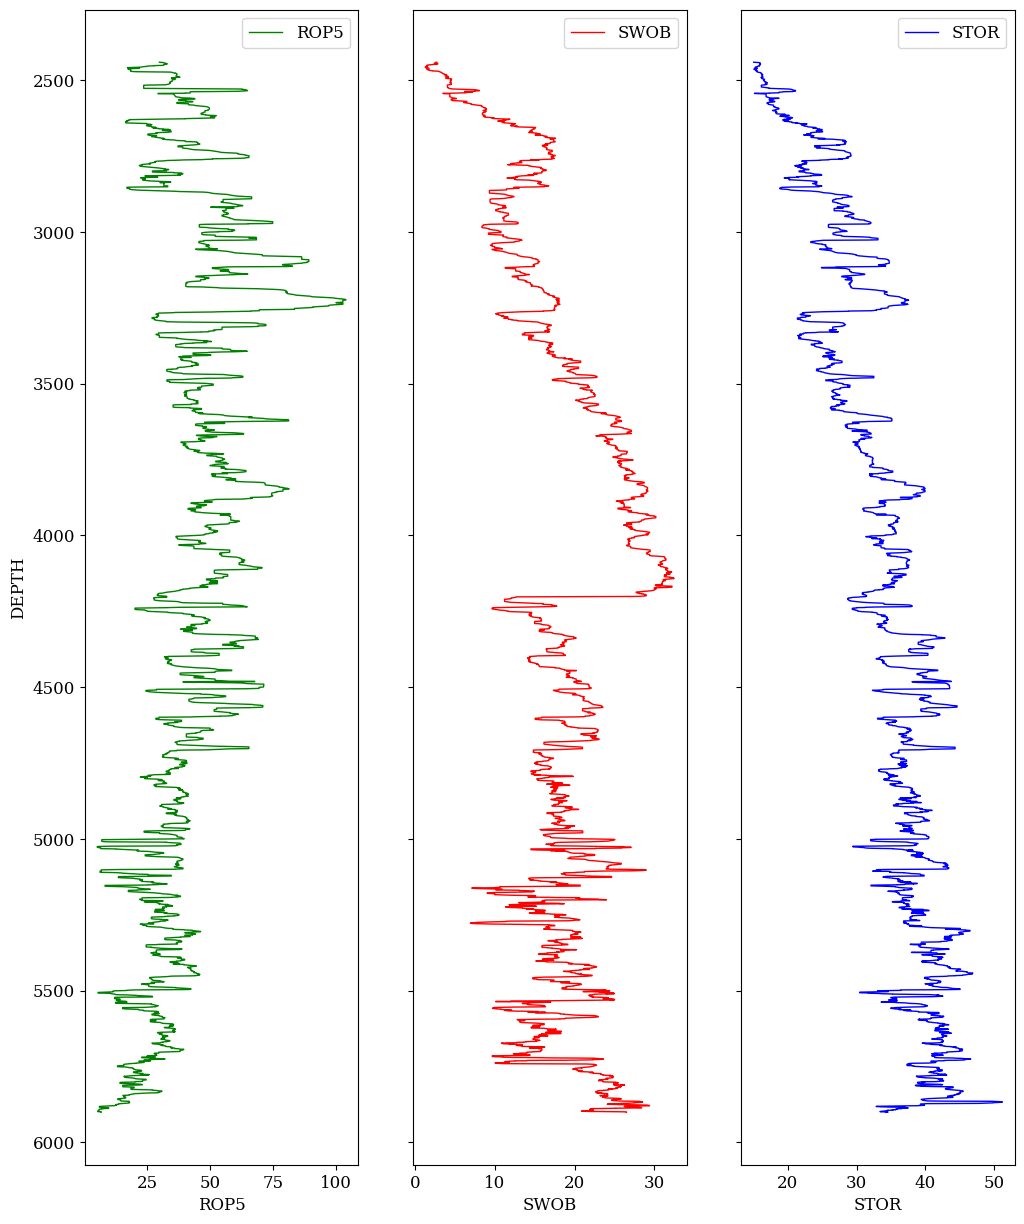

In [274]:
# It is common practice in drilling to check different surface parameters behaviour at the same time.

# This figure shows sub-plot with 3 paramters.

fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(12,15),sharey=True)


ax1.plot(df['ROP5'].rolling(window=20).median(),df['DEPTH'], label = 'ROP5', lw =1, color ='green') 

ax2.plot(df['SWOB'].rolling(window=20).median(),df['DEPTH'], label = 'SWOB', lw =1, color ='red')

ax3.plot(df['STOR'].rolling(window=20).median(),df['DEPTH'], label = 'STOR', lw =1, color ='blue')

ax1.set_ylabel('DEPTH')
ax1.set_xlabel('ROP5')
ax2.set_xlabel('SWOB')
ax3.set_xlabel('STOR')

ax1.legend()

ax2.legend()

ax3.legend()

plt.gca().invert_yaxis()




# Adding formation Marker to The Plot

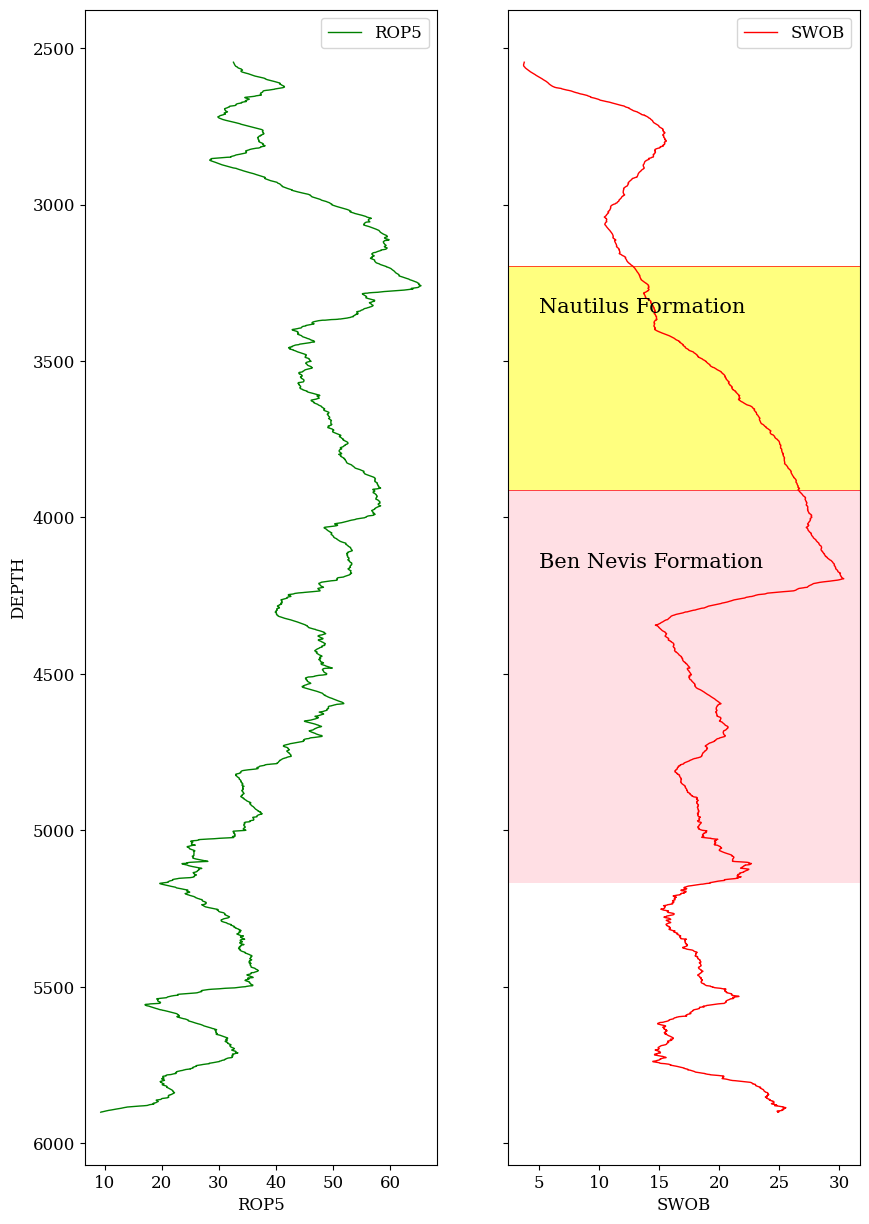

In [275]:
# We can annotante plot area with geological marker, name and seperate geological layer with different color 



fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,15),sharey=True)


ax1.plot(df['ROP5'].rolling(window=200).mean(),df['DEPTH'], label = 'ROP5', lw =1, color ='green')

ax2.plot(df['SWOB'].rolling(window=200).mean(),df['DEPTH'], label = 'SWOB', lw =1, color ='red')

ax1.set_ylabel('DEPTH')
ax1.set_xlabel('ROP5')
ax2.set_xlabel('SWOB')


#Adding formation tag. Two formation tag added in the figure below, you can try more



plt.axhline(y=3195, color='r', linestyle='-', lw=0.5)
plt.text(5, 3195+150, 'Nautilus Formation', fontsize = 15)


plt.axhline(y=3911, color='r', linestyle='-', lw=0.5)
plt.text(5, 3911+250, 'Ben Nevis Formation', fontsize = 15)



ax2.axhspan(3195,3911,  facecolor='yellow', alpha=0.5)
ax2.axhspan(3911, 5168, facecolor='pink', alpha=0.5)



ax1.legend()

ax2.legend()

plt.gca().invert_yaxis()

plt.show()

# Save data to csv file

In [276]:
# Before saving data to a csv file, let us have a final look on the content.
# There are 5610 rows and 12 columns

df

TIME      DEPTH     SWOB     STOR    RPM     ROP5  \
0    2013-11-09 07:15:36  2427.5371  14.3337   6.7791   40.0   4.8685   
1    2013-11-09 09:17:36  2429.7649   1.2809  13.2328   99.0  15.8604   
2    2013-11-09 09:18:36  2430.2273   2.6199  14.1276   81.0  22.3100   
3    2013-11-09 09:19:36  2430.7432   2.5669  13.9649   82.0  27.7772   
4    2013-11-09 09:20:36  2431.4077   3.6538  16.5139   81.0  32.4092   
...                  ...        ...      ...      ...    ...      ...   
5608 2013-11-16 09:20:36  5900.2856  24.0114  34.8581  162.0   6.0121   
5609 2013-11-16 09:22:36  5900.4902  23.0168  34.8988  162.0   6.1993   
5610 2013-11-16 09:23:36  5900.6245  23.7346  34.1259  163.0   6.1923   
5611 2013-11-16 09:24:36  5900.7095  23.6831  32.5261  161.0   6.1032   
5612 2013-11-16 09:29:36  5900.9453  20.2213  33.5429  161.0   5.0549   

          SPPA      SMSE      TFLO  COBTM       ECD                Formation  
0     13306.61    1.6884  2775.691    0.0  1500.823  Dawson Canyon Formation  
1     12618.78   15.0119  2819.716    0.0  1467.436  Dawson Canyon Formation  
2     13522.76   11.9149  3000.393    0.0  1466.613  Dawson Canyon Formation  
3     13537.10    9.0085  2978.816    0.0  1467.561  Dawson Canyon Formation  
4     13529.93    7.8089  3003.081    0.0  1467.761  Dawson Canyon Formation  
...        ...       ...       ...    ...       ...                      ...  
5608  27855.03  133.8819  3642.172    0.0  1471.615      Whiterose Formation  
5609  27768.01  290.1676  3599.056    0.0  1472.348      Whiterose Formation  
5610  27811.24  197.4735  3615.220    0.0  1471.682      Whiterose Formation  
5611  27831.38  190.6714  3631.421    0.0  1471.443      Whiterose Formation  
5612  27792.01  419.8892  3620.633    0.0  1471.552      Whiterose Formation  

[5613 rows x 12 columns]

In [277]:
df

TIME      DEPTH     SWOB     STOR    RPM     ROP5  \
0    2013-11-09 07:15:36  2427.5371  14.3337   6.7791   40.0   4.8685   
1    2013-11-09 09:17:36  2429.7649   1.2809  13.2328   99.0  15.8604   
2    2013-11-09 09:18:36  2430.2273   2.6199  14.1276   81.0  22.3100   
3    2013-11-09 09:19:36  2430.7432   2.5669  13.9649   82.0  27.7772   
4    2013-11-09 09:20:36  2431.4077   3.6538  16.5139   81.0  32.4092   
...                  ...        ...      ...      ...    ...      ...   
5608 2013-11-16 09:20:36  5900.2856  24.0114  34.8581  162.0   6.0121   
5609 2013-11-16 09:22:36  5900.4902  23.0168  34.8988  162.0   6.1993   
5610 2013-11-16 09:23:36  5900.6245  23.7346  34.1259  163.0   6.1923   
5611 2013-11-16 09:24:36  5900.7095  23.6831  32.5261  161.0   6.1032   
5612 2013-11-16 09:29:36  5900.9453  20.2213  33.5429  161.0   5.0549   

          SPPA      SMSE      TFLO  COBTM       ECD                Formation  
0     13306.61    1.6884  2775.691    0.0  1500.823  Dawson Canyon Formation  
1     12618.78   15.0119  2819.716    0.0  1467.436  Dawson Canyon Formation  
2     13522.76   11.9149  3000.393    0.0  1466.613  Dawson Canyon Formation  
3     13537.10    9.0085  2978.816    0.0  1467.561  Dawson Canyon Formation  
4     13529.93    7.8089  3003.081    0.0  1467.761  Dawson Canyon Formation  
...        ...       ...       ...    ...       ...                      ...  
5608  27855.03  133.8819  3642.172    0.0  1471.615      Whiterose Formation  
5609  27768.01  290.1676  3599.056    0.0  1472.348      Whiterose Formation  
5610  27811.24  197.4735  3615.220    0.0  1471.682      Whiterose Formation  
5611  27831.38  190.6714  3631.421    0.0  1471.443      Whiterose Formation  
5612  27792.01  419.8892  3620.633    0.0  1471.552      Whiterose Formation  

[5613 rows x 12 columns]

In [278]:
# Dropping the columns by name (for example, columns 'B' and 'D')
df1 = df.drop(['TIME', 'COBTM', 'SMSE'], axis=1)

In [279]:
df1

DEPTH     SWOB     STOR    RPM     ROP5      SPPA      TFLO  \
0     2427.5371  14.3337   6.7791   40.0   4.8685  13306.61  2775.691   
1     2429.7649   1.2809  13.2328   99.0  15.8604  12618.78  2819.716   
2     2430.2273   2.6199  14.1276   81.0  22.3100  13522.76  3000.393   
3     2430.7432   2.5669  13.9649   82.0  27.7772  13537.10  2978.816   
4     2431.4077   3.6538  16.5139   81.0  32.4092  13529.93  3003.081   
...         ...      ...      ...    ...      ...       ...       ...   
5608  5900.2856  24.0114  34.8581  162.0   6.0121  27855.03  3642.172   
5609  5900.4902  23.0168  34.8988  162.0   6.1993  27768.01  3599.056   
5610  5900.6245  23.7346  34.1259  163.0   6.1923  27811.24  3615.220   
5611  5900.7095  23.6831  32.5261  161.0   6.1032  27831.38  3631.421   
5612  5900.9453  20.2213  33.5429  161.0   5.0549  27792.01  3620.633   

           ECD                Formation  
0     1500.823  Dawson Canyon Formation  
1     1467.436  Dawson Canyon Formation  
2     1466.613  Dawson Canyon Formation  
3     1467.561  Dawson Canyon Formation  
4     1467.761  Dawson Canyon Formation  
...        ...                      ...  
5608  1471.615      Whiterose Formation  
5609  1472.348      Whiterose Formation  
5610  1471.682      Whiterose Formation  
5611  1471.443      Whiterose Formation  
5612  1471.552      Whiterose Formation  

[5613 rows x 9 columns]

In [280]:
columns_to_move = ['ROP5']

new_order = [col for col in df.columns if col not in columns_to_move] + columns_to_move

df1 = df[new_order]



In [281]:
df2 = df1.drop(['TIME', 'COBTM', 'SMSE'], axis=1)

In [282]:
df2

DEPTH     SWOB     STOR    RPM      SPPA      TFLO       ECD  \
0     2427.5371  14.3337   6.7791   40.0  13306.61  2775.691  1500.823   
1     2429.7649   1.2809  13.2328   99.0  12618.78  2819.716  1467.436   
2     2430.2273   2.6199  14.1276   81.0  13522.76  3000.393  1466.613   
3     2430.7432   2.5669  13.9649   82.0  13537.10  2978.816  1467.561   
4     2431.4077   3.6538  16.5139   81.0  13529.93  3003.081  1467.761   
...         ...      ...      ...    ...       ...       ...       ...   
5608  5900.2856  24.0114  34.8581  162.0  27855.03  3642.172  1471.615   
5609  5900.4902  23.0168  34.8988  162.0  27768.01  3599.056  1472.348   
5610  5900.6245  23.7346  34.1259  163.0  27811.24  3615.220  1471.682   
5611  5900.7095  23.6831  32.5261  161.0  27831.38  3631.421  1471.443   
5612  5900.9453  20.2213  33.5429  161.0  27792.01  3620.633  1471.552   

                    Formation     ROP5  
0     Dawson Canyon Formation   4.8685  
1     Dawson Canyon Formation  15.8604  
2     Dawson Canyon Formation  22.3100  
3     Dawson Canyon Formation  27.7772  
4     Dawson Canyon Formation  32.4092  
...                       ...      ...  
5608      Whiterose Formation   6.0121  
5609      Whiterose Formation   6.1993  
5610      Whiterose Formation   6.1923  
5611      Whiterose Formation   6.1032  
5612      Whiterose Formation   5.0549  

[5613 rows x 9 columns]

In [283]:
# df2.to_csv("G:\\My Drive\\ACENET Class 2024\\1. ISP Class\\1. ISP 2 July Class\\1638 Processed.csv", index = False)



Step 1: Data Preprocessing

In [284]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [291]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Drop rows with missing target values
data = df2.dropna(subset=['ROP5'])

# Separate features and target variable
X = data.drop(columns=['ROP5'])
y = data['ROP5']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)





In [292]:
# Initialize and train the ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1))  # Assuming a regression problem

ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model and store the training history
history = ann_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=10, verbose=0) 

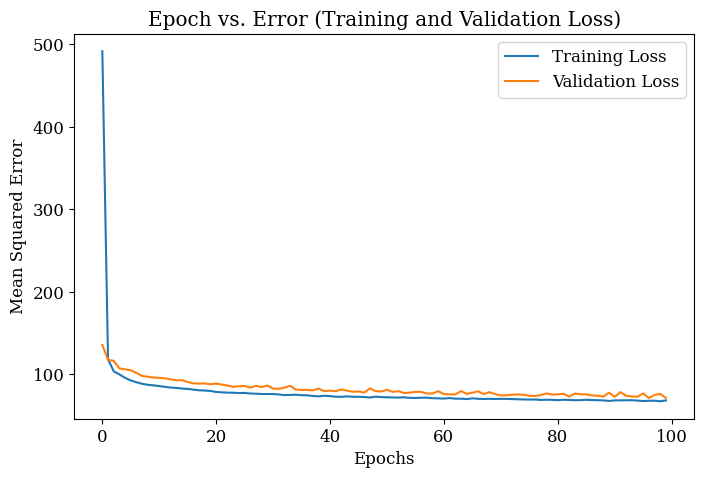

In [299]:

# Plot epoch vs error (loss) for both training and validation data
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Epoch vs. Error (Training and Validation Loss)')
plt.legend()
plt.grid(False)
plt.show()


Step 2: Model Selection and Training

In [294]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [295]:
# Evaluate the models
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

ann_mae = mean_absolute_error(y_test, ann_pred)
ann_mse = mean_squared_error(y_test, ann_pred)
ann_r2 = r2_score(y_test, ann_pred)

# Output the evaluation metrics for each model
print("Linear Regression - MAE: {:.4f}, MSE: {:.4f}, R2: {:.4f}".format(lr_mae, lr_mse, lr_r2))
print("Random Forest - MAE: {:.4f}, MSE: {:.4f}, R2: {:.4f}".format(rf_mae, rf_mse, rf_r2))
print("ANN - MAE: {:.4f}, MSE: {:.4f}, R2: {:.4f}".format(ann_mae, ann_mse, ann_r2))


Linear Regression - MAE: 8.4955, MSE: 124.4878, R2: 0.6816
Random Forest - MAE: 5.6445, MSE: 64.1019, R2: 0.8360
ANN - MAE: 6.2809, MSE: 74.0328, R2: 0.8106


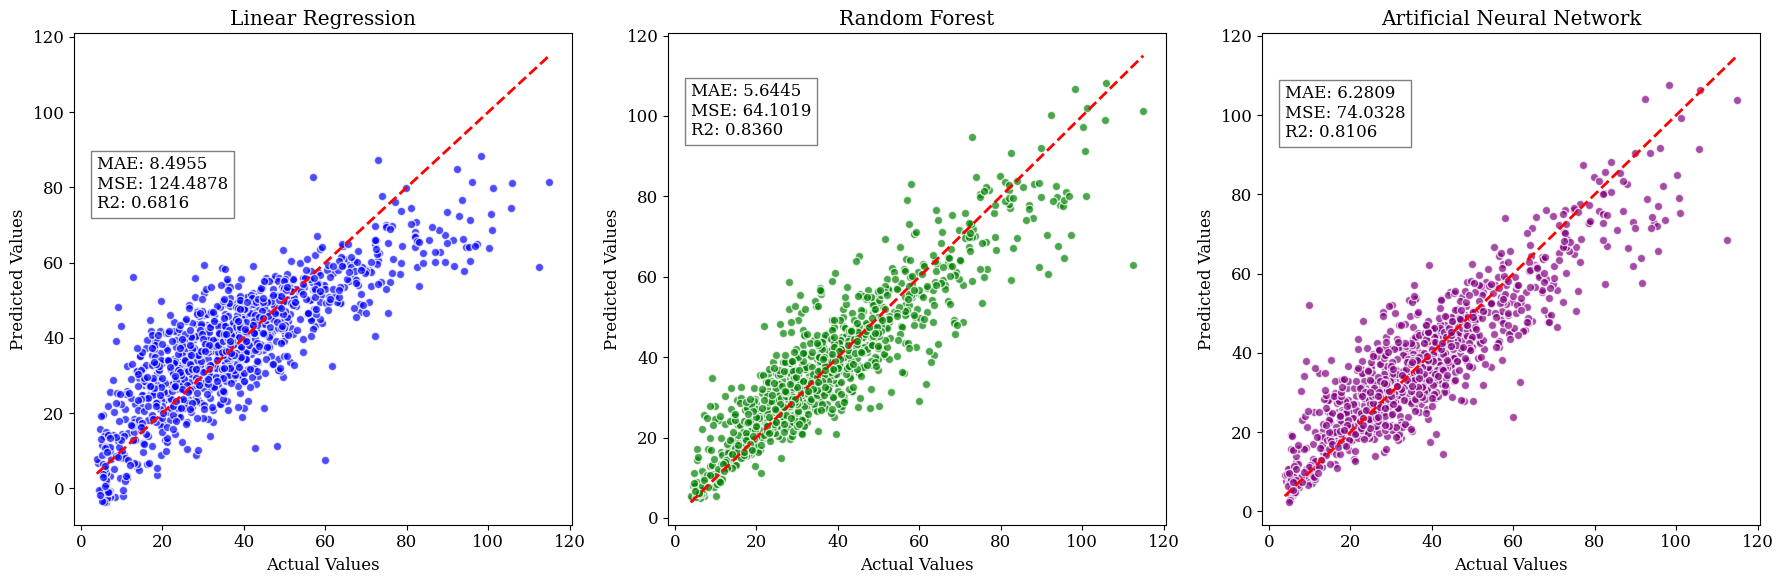

In [296]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values for Linear Regression
plt.figure(figsize=(18, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, lr_pred, color='blue', edgecolor='w', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.text(min(y_test), max(lr_pred), f'MAE: {lr_mae:.4f}\nMSE: {lr_mse:.4f}\nR2: {lr_r2:.4f}', 
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, rf_pred, color='green', edgecolor='w', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest')
plt.text(min(y_test), max(rf_pred), f'MAE: {rf_mae:.4f}\nMSE: {rf_mse:.4f}\nR2: {rf_r2:.4f}', 
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# ANN
plt.subplot(1, 3, 3)
plt.scatter(y_test, ann_pred, color='purple', edgecolor='w', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Artificial Neural Network')
plt.text(min(y_test), max(ann_pred), f'MAE: {ann_mae:.4f}\nMSE: {ann_mse:.4f}\nR2: {ann_r2:.4f}', 
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()


Grid Search

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




# Drop rows with missing target values
data = df2.dropna(subset=['ROP5'])

# Separate features and target variable
X = data.drop(columns=['ROP5'])
y = data['ROP5']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

best_params, mae, mse, r2


Fitting 5 folds for each of 108 candidates, totalling 540 fits


({'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 5.6241402530742075,
 63.76331115139508,
 0.8369045460341388)

Hyperparameter Tuning with Grid Search for XGBoost

In [ ]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 960.0 kB/s eta 0:02:11
   ---------------------------------------- 0.2/124.9 MB 2.4 MB/s eta 0:00:53
   ---------------------------------------- 0.4/124.9 MB 2.9 MB/s eta 0:00:44
   ---------------------------------------- 0.6/124.9 MB 3.5 MB/s eta 0:00:36
   ---------------------------------------- 1.2/124.9 MB 5.1 MB/s eta 0:00:25
    --------------------------------------- 2.4/124.9 MB 7.9 MB/s eta 0:00:16
   - -------------------------------------- 3.6/124.9 MB 10.6 MB/s eta 0:00:12
   - -------------------------------------- 4.7/124.9 MB 12.0 MB/s eta 0:00:10
   - -------------------------------------- 6.1/124.9 MB 13.9 MB/s eta 0:00:09
   -- ------------------------------------- 7.0/124.9 MB 14.3 MB/s eta 0:00:09
   -- ------------------------------------- 8.5/124.9 MB 15.6 MB/

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb



# Drop rows with missing target values
data = df2.dropna(subset=['ROP5'])

# Separate features and target variable
X = data.drop(columns=['ROP5'])
y = data['ROP5']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

best_params, mae, mse, r2


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


({'colsample_bytree': 0.8,
  'learning_rate': 0.1,
  'max_depth': 5,
  'n_estimators': 200,
  'subsample': 0.8},
 5.757064176717403,
 62.015352425711505,
 0.8413755202782784)